### - SVs Unmatched Analysis: TRIPLE CALLER

In [3]:
import isabl_cli as ii
import os

In [4]:
from pybedtools import BedTool

In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [8]:
from matplotlib_venn import venn2, venn2_circles

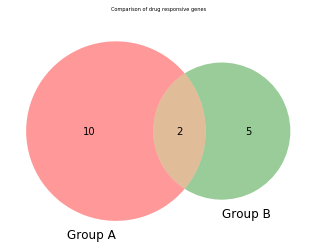

In [9]:
venn2(subsets = (10, 5, 2), set_labels = ('Group A', 'Group B'))
plt.rcParams.update({'font.size': 20})
plt.title('Comparison of drug responsive genes\n',fontsize=5)
plt.show()

In [10]:
for exper in ii.get_experiments(projects=321, sample__category="TUMOR"):
    sample = exper.system_id
    bam = ii.Experiment(sample).bam_files.GRCh37.url
    if bam:
        print(bam)

Retrieving 91 from experiments API endpoint...


/work/isabl/data/analyses/29/38/252938/IID_H158604_T01_01_WG01.bam
/work/isabl/data/analyses/29/40/252940/IID_H158605_T01_01_WG01.bam
/work/isabl/data/analyses/29/42/252942/IID_H158606_T01_01_WG01.bam
/work/isabl/data/analyses/29/44/252944/IID_H158607_T01_01_WG01.bam
/work/isabl/data/analyses/29/46/252946/IID_H158608_T01_01_WG01.bam
/work/isabl/data/analyses/29/48/252948/IID_H158609_T01_01_WG01.bam
/work/isabl/data/analyses/29/50/252950/IID_H158610_T01_01_WG01.bam
/work/isabl/data/analyses/29/52/252952/IID_H158611_T01_01_WG01.bam
/work/isabl/data/analyses/29/54/252954/IID_H158612_T01_01_WG01.bam
/work/isabl/data/analyses/29/56/252956/IID_H158613_T01_01_WG01.bam
/work/isabl/data/analyses/29/58/252958/IID_H158614_T01_01_WG01.bam
/work/isabl/data/analyses/29/60/252960/IID_H158615_T01_01_WG01.bam
/work/isabl/data/analyses/29/62/252962/IID_H158616_T01_01_WG01.bam
/work/isabl/data/analyses/29/64/252964/IID_H158617_T01_01_WG01.bam
/work/isabl/data/analyses/29/66/252966/IID_H158618_T01_01_WG01

In [11]:
os.path.basename('/work/isabl/data/analyses/29/38/252938/IID_H158604_T01_01_WG01.bam').strip('.bam')

'IID_H158604_T01_01_WG01'

In [12]:
os.path.join('/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_SVs', 'IID_H158604_T01_01_WG01')

'/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_SVs/IID_H158604_T01_01_WG01'

# - Benchmarking SVs: uk_ALL

In [13]:
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1- Matched Data: Brass + Triple Caller

In [14]:
total_brass_uk=!isabl get-outdirs -fi application__name BRASS -fi targets__projects 321 -fi status SUCCEEDED
del total_brass_uk[0]
print(len(total_brass_uk))

total_tc_uk=!isabl get-outdirs -fi application__name ANNOT_SVS -fi targets__projects 321 -fi status SUCCEEDED
del total_tc_uk[0]
len(total_tc_uk)

57


57

In [15]:
total_tc_uk[0:10]

['/work/isabl/data/analyses/06/21/260621',
 '/work/isabl/data/analyses/06/22/260622',
 '/work/isabl/data/analyses/06/23/260623',
 '/work/isabl/data/analyses/06/24/260624',
 '/work/isabl/data/analyses/06/25/260625',
 '/work/isabl/data/analyses/06/26/260626',
 '/work/isabl/data/analyses/06/27/260627',
 '/work/isabl/data/analyses/06/29/260629',
 '/work/isabl/data/analyses/06/30/260630',
 '/work/isabl/data/analyses/06/31/260631']

There are 57 samples for uk_all with a Brass and Annot_SVs ouputs. (TC=Triple Caller).

In [17]:
#Extract the name of the cases by BRASS and use them for the Triple Caller
samples_isabl=[]
for n in total_brass_uk:
    path=n+'/*.bedpe'
    file=!ls {path}
    samples_isabl.append(file[0].split('/')[8].split('_vs')[0])
samples_isabl[0]

'IID_H158612_T01_01_WG01'

In [57]:
triple_full=pd.DataFrame()
for n in samples_isabl:
    #isabl
    list_annotSVs=!isabl get-outdirs -fi application__name ANNOT_SVS -fi targets__system_id {n}
    path=list_annotSVs[1]+'/merged_svs.pass.annotated.tsv'
    svs_pass=!ls {path}
    triple_patient=pd.read_csv(svs_pass[0],sep='\t')
    triple_patient['Sample']=n
    
    #num_reads=list()
    #for index,row in triple_patient.iterrows():
        #for f in row['INFO'].split(';'):
            #if ('brass_TSRDS' in f):
                #reads=len(f.split(','))
                #num_reads.append(reads)

    #print(len(num_reads))
    #print(triple_patient.shape)
    #triple_patient['score']=num_reads
    
    triple_patient=triple_patient[['SV chrom','SV start','SV end','ID','SV type','Sample']]
    triple_full=triple_full.append(triple_patient)
    
print(triple_full.shape)
triple_full.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (35,38,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(52845, 6)


,SV chrom,SV start,SV end,ID,SV type,Sample
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01
1,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01
2,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01
4,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01


In [61]:
triple_full_dup=triple_full.drop_duplicates()
print(triple_full_dup.shape)

(1488, 6)


In [228]:
triple_full_dup[triple_full_dup['Sample']=='IID_H158612_T01_01_WG01']

,SV chrom,SV start,SV end,ID,SV type,Sample
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01
12,14,22866085,22918105,14_22866085_14_22918105_DEL_+-,DEL,IID_H158612_T01_01_WG01
14,14,22892030,22976665,14_22892030_14_22976665_DEL_+-,DEL,IID_H158612_T01_01_WG01
16,14,22908005,22918118,14_22908005_14_22918118_DEL_+-,DEL,IID_H158612_T01_01_WG01
18,14,106315458,106383257,14_106315458_14_106383257_DEL_+-,DEL,IID_H158612_T01_01_WG01
23,14,106329450,106805207,14_106329450_14_106805207_DEL_+-,DEL,IID_H158612_T01_01_WG01
27,14,106330447,106586142,14_106330447_14_106586142_DEL_+-,DEL,IID_H158612_T01_01_WG01
30,14,106881446,107048677,14_106881446_14_107048677_DEL_+-,DEL,IID_H158612_T01_01_WG01
32,14,107095155,107169928,14_107095155_14_107169928_DEL_+-,DEL,IID_H158612_T01_01_WG01


- Number Reads:

In [319]:
triple_full_info=pd.DataFrame()
for n in samples_isabl:
    #isabl
    list_annotSVs=!isabl get-outdirs -fi application__name ANNOT_SVS -fi targets__system_id {n}
    path=list_annotSVs[1]+'/merged_svs.pass.annotated.tsv'
    svs_pass=!ls {path}
    triple_patient_info=pd.read_csv(svs_pass[0],sep='\t')
    triple_patient_info['Sample']=n
    
    #Number of Reads
    brass_RC=[]
    gridss_VF=[]
    svaba_AD=[]
    brass_PS=[]
    gridss_RF=[]
    svaba_DP=[]
    for index,row in triple_patient_info.iterrows():
        format_list=row['FORMAT'].split(':')
        if ('brass_RC' in format_list):
            brass_RC.append(row[str(n)].split(':')[format_list.index('brass_RC')])
            #brass_PS.append(row[str(n)].split(':')[format_list.index('brass_PS')-1])
        else:
            brass_RC.append(0)
            brass_PS.append(0)
            
        if ('gridss_VF' in format_list):    
            gridss_VF.append(row[str(n)].split(':')[format_list.index('gridss_VF')])
            #gridss_RF.append(row[str(n)].split(':')[format_list.index('gridss_RF')-1])
        else:
            gridss_VF.append(0)
            gridss_RF.append(0)
            
        if ('svaba_AD' in format_list):
            svaba_AD.append(row[str(n)].split(':')[format_list.index('svaba_AD')])
            #svaba_DP.append(row[str(n)].split(':')[format_list.index('svaba_DP')-1])
        else:
            svaba_AD.append(0)
            svaba_DP.append(0)
        

    #print(len(num_reads))
    #print(triple_patient.shape)
    #triple_patient['score']=num_reads
    

    triple_patient_info['brass_RC']=brass_RC
    triple_patient_info['gridss_VF']=gridss_VF
    triple_patient_info['svaba_AD']=svaba_AD
    
    triple_patient_info=triple_patient_info[['SV chrom','SV start','SV end','ID','SV type','Sample','brass_RC','gridss_VF','svaba_AD']]
    triple_full_info=triple_full_info.append(triple_patient_info)
    
print(triple_full_info.shape)
triple_full_info.head()

(52845, 9)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,0,8
1,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,0,8
2,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,0,8
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,14,9
4,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,14,9


In [320]:
triple_full_info_dup=triple_full_info.drop_duplicates()
print(triple_full_info_dup.shape)

(1488, 9)


### 2- TINder SVs:

In [62]:
tinder_dirs='/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_sv_1213/*/*.annotated.flagged.output.tsv'
tinder_svs=!ls {tinder_dirs}
print(len(tinder_svs))
tinder_svs[0:9]

58


['/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_sv_1213/IID_H158604_T01_01_WG01/IID_H158604_T01_01_WG01_vs_I-H-108298-N1-1-D1-1.annotated.flagged.output.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_sv_1213/IID_H158605_T01_01_WG01/IID_H158605_T01_01_WG01_vs_I-H-108298-N1-1-D1-1.annotated.flagged.output.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_sv_1213/IID_H158606_T01_01_WG01/IID_H158606_T01_01_WG01_vs_I-H-108298-N1-1-D1-1.annotated.flagged.output.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_sv_1213/IID_H158607_T01_01_WG01/IID_H158607_T01_01_WG01_vs_I-H-108298-N1-1-D1-1.annotated.flagged.output.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_sv_1213/IID_H158608_T01_01_WG01/IID_H158608_T01_01_WG01_vs_I-H-108298-N1-1-D1-1.annotated.flagged.output.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/tes

There are 2 patients pending because of annotation: already fixed
    - IID_H158639
    - IID_H158668
    
There are three patients with failed Brass Unmatched: already fixed
    - IID_H158607
    - IID_H158613
    - IID_H158634
    
Also, one of uk_all samples is unmatched:
    - IID_H158647

#### - Outputs Joe's Annotation:

In [63]:
tinder_full=pd.DataFrame(columns=['chr1','start1','chr2','start2','SV length','brass_score','SV type','Gene name','oncogene','tsg','AnnotSV type','FORMAT','DHFC','DHFFC','DHBFC','blacklist','Sample','GD_AF','GD_POPMAX_AF'])

for n in tinder_svs:
    #Joe's output click_annotsv
    name=n.split('/')[9]
    tinder_annot = pd.read_csv(n,sep='\t')
    #print(tinder_annot.columns.values)
    tinder_annot_filters=tinder_annot[tinder_annot['cat1_filters']==0]
    
    #Full
    tinder_annot_filters_full=tinder_annot_filters[tinder_annot_filters['AnnotSV type']=='full']
    tinder_annot_filters_full=tinder_annot_filters_full[['chr1','start1','chr2','start2','SV length','brass_score','SV type','Gene name','oncogene','tsg','AnnotSV type','FORMAT','DHFC','DHFFC','DHBFC','blacklist','GD_AF','GD_POPMAX_AF']]
    tinder_annot_filters_full['Sample']=name
    tinder_annot_filters_full.drop(columns=['FORMAT'],inplace=True)
    tinder_annot_filters_full=tinder_annot_filters_full.sort_values('brass_score',ascending=False).reset_index(drop=True)

    tinder_full=tinder_full.append(tinder_annot_filters_full)

tinder_full=tinder_full[['chr1','start1','chr2','start2','SV length','brass_score','SV type','DHFC','DHFFC','DHBFC','blacklist','GD_AF','GD_POPMAX_AF','Sample','oncogene','tsg','Gene name']]
tinder_full=tinder_full.reset_index(drop=True)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (39,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,36,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compile

In [64]:
print(tinder_full.shape)
tinder_full.head()

(4678, 17)


,chr1,start1,chr2,start2,SV length,brass_score,SV type,DHFC,DHFFC,DHBFC,blacklist,GD_AF,GD_POPMAX_AF,Sample,oncogene,tsg,Gene name
0,14,49067539,14,49429619,362080.0,61.0,DEL,1.556960,0.842466,1.500000,0.0,-1,-1.000000,IID_H158604_T01_01_WG01,0.0,0.0,NaN
1,14,22866688,14,23004505,137817.0,47.0,DEL,0.367089,0.333333,0.371795,0.0,0.005078999791294336,0.005808,IID_H158604_T01_01_WG01,0.0,0.0,LOC105370401
2,12,6791753,22,41528145,NaN,45.0,TRA,NaN,NaN,NaN,1.0,-1,-1.000000,IID_H158604_T01_01_WG01,0.0,0.0,ZNF384
3,22,41528145,12,6791753,NaN,45.0,TRA,NaN,NaN,NaN,0.0,-1,-1.000000,IID_H158604_T01_01_WG01,0.0,1.0,EP300
4,14,106330071,14,106667589,337518.0,36.0,DEL,0.544304,0.860000,0.551282,0.0,0.00735800014808774,0.034193,IID_H158604_T01_01_WG01,0.0,0.0,ADAM6/FAM30A


- Unmatched:

In [321]:
#Take into account that one of the patients is unmatched (IID_H158647_T01_01_WG01)
tinder_full_set=tinder_full[~(tinder_full['Sample']=='IID_H158647_T01_01_WG01')]
print(tinder_full.shape,'\t',tinder_full_set.shape)

(4678, 17) 	 (4594, 17)


- BTG:

In [66]:
#Take into account that five patients have not unmatched results (IID_H158647_T01_01_WG01,IID_H158647_T01_01_WG01,IID_H158647_T01_01_WG01,IID_H158647_T01_01_WG01,IID_H158647_T01_01_WG01)
#brass_full_set=brass_full[~( (brass_full['sample']=='IID_H158639_T01_01_WG01') | (brass_full['sample']=='IID_H158668_T01_01_WG01')  |(brass_full['sample']=='IID_H158607_T01_01_WG01') | (brass_full['sample']=='IID_H158613_T01_01_WG01') | (brass_full['sample']=='IID_H158634_T01_01_WG01'))]
#print(brass_full.shape,'\t',brass_full_set.shape)

### - gnomAD Germline Events: tinder_full_set

In [330]:
tinder_full_set=tinder_full_set[tinder_full_set['GD_POPMAX_AF']<=0.02]
tinder_full_set.shape

(4499, 17)

### A) Intersection Deletion:

### 1.1) Output of TINder detected by the Triple Caller: red + yellow

In [422]:
tinder_full_set_DEL=tinder_full_set[tinder_full_set['SV type']=='DEL']
tinder_full_set_DEL_2intersect=tinder_full_set_DEL[['chr1','start1','start2','SV length','brass_score','SV type','Sample','DHFFC','blacklist','GD_AF','GD_POPMAX_AF']]
#tinder_full_DEL_2intersect=tinder_full_DEL[['chr1','start1','start2','SV length','brass_score','SV type','DHFC','DHFFC','DHBFC','blacklist','Sample']]

tinder_full_set_DEL_2intersect['brass_score']=tinder_full_set_DEL_2intersect['brass_score'].map(int)
tinder_full_set_DEL_2intersect['SV length']=tinder_full_set_DEL_2intersect['SV length'].map(int)
tinder_full_set_DEL_2intersect['blacklist']=tinder_full_set_DEL_2intersect['blacklist'].map(int)
tinder_full_set_DEL_2intersect['DHFFC']=tinder_full_set_DEL_2intersect['DHFFC'].map(str)
tinder_full_set_DEL_2intersect['GD_AF']=tinder_full_set_DEL_2intersect['GD_AF'].map(str)
tinder_full_set_DEL_2intersect['GD_POPMAX_AF']=tinder_full_set_DEL_2intersect['GD_POPMAX_AF'].map(str)


#tinder_full_DEL_2intersect['start1']=tinder_full_DEL_2intersect['start1'].map(int)

print(tinder_full_set_DEL_2intersect.shape)
tinder_full_set_DEL_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

(648, 11)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be s

,chr1,start1,start2,SV length,brass_score,SV type,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF
0,14,49067539,49429619,362080,61,DEL,IID_H158604_T01_01_WG01,0.8424659999999999,0,-1,-1.0
1,14,22866688,23004505,137817,47,DEL,IID_H158604_T01_01_WG01,0.333333,0,0.005078999791294336,0.0058079999871552
5,14,102562993,106373074,3810081,36,DEL,IID_H158604_T01_01_WG01,0.84,0,-1,-1.0
16,17,43691148,44354376,663228,14,DEL,IID_H158604_T01_01_WG01,0.47618999999999995,0,-1,-1.0
17,2,87566157,87770015,203858,7,DEL,IID_H158604_T01_01_WG01,0.0675676,0,-1,-1.0


In [ ]:
____________________________

- For the future, and once a table with the tags Detected/NonDetected would has been created, the plan would be to filter from that table based on:
    - Brass Score
    - GD_POPMAX_AF
    - DupHold

In [271]:
print('TOTAL\t',tinder_full_set_DEL_2intersect.shape)

print('Brass score\t',tinder_full_set_DEL_2intersect[tinder_full_set_DEL_2intersect['brass_score']>=10].shape)

tinder_full_set_DEL_2intersect['GD_POPMAX_AF']=tinder_full_set_DEL_2intersect['GD_POPMAX_AF'].map(float)
print('gnomAD\t',tinder_full_set_DEL_2intersect[tinder_full_set_DEL_2intersect['GD_POPMAX_AF']<=0.02].shape)

tinder_full_set_DEL_2intersect['DHFFC']=tinder_full_set_DEL_2intersect['DHFFC'].map(float)
print('DHFCC\t',tinder_full_set_DEL_2intersect[tinder_full_set_DEL_2intersect['DHFFC']<=0.7].shape)

print('Score + gnomAD + duphold\t',tinder_full_set_DEL_2intersect[(tinder_full_set_DEL_2intersect['brass_score']>=10)&(tinder_full_set_DEL_2intersect['GD_POPMAX_AF']<0.02)&(tinder_full_set_DEL_2intersect['DHFFC']<=0.7)].shape)

TOTAL	 (741, 11)
Brass score	 (540, 11)
gnomAD	 (648, 11)
DHFCC	 (423, 11)
Score + gnomAD + duphold	 (319, 11)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [272]:
tinder_full_set_DEL_Brass_AD_Duph_2intersect=tinder_full_set_DEL_2intersect[(tinder_full_set_DEL_2intersect['brass_score']>=10) & (tinder_full_set_DEL_2intersect['GD_POPMAX_AF']<=0.02) & (tinder_full_set_DEL_2intersect['DHFFC']<=0.7)]
tinder_full_set_DEL_Brass_AD_Duph_2intersect.head()

,chr1,start1,start2,SV length,brass_score,SV type,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF
1,14,22866688,23004505,137817,47,DEL,IID_H158604_T01_01_WG01,0.333333,0,0.005078999791294336,0.005808
16,17,43691148,44354376,663228,14,DEL,IID_H158604_T01_01_WG01,0.476190,0,-1,-1.000000
52,5,60201994,60294534,92540,47,DEL,IID_H158605_T01_01_WG01,0.475000,0,4.70000013592653e-05,0.000561
57,9,15424527,22380855,6956328,39,DEL,IID_H158605_T01_01_WG01,0.610390,0,-1,-1.000000
58,9,21975805,22009648,33843,37,DEL,IID_H158605_T01_01_WG01,0.347826,0,-1,-1.000000


In [ ]:
____________________________

In [423]:
triple_full_info_dup.head(2)

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,0,8
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,14,9


In [424]:
triple_full_info_dup_DEL=triple_full_info_dup[triple_full_info_dup['SV type']=='DEL']
print(triple_full_info_dup_DEL.shape)
triple_full_info_dup_DEL.head()

(790, 9)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,0,8
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,14,9
12,14,22866085,22918105,14_22866085_14_22918105_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,31,13
14,14,22892030,22976665,14_22892030_14_22976665_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,0,8
16,14,22908005,22918118,14_22908005_14_22918118_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,28,28


In [425]:
triple_full_info_dup_DEL_2intersect=triple_full_info_dup_DEL.copy()
triple_full_info_dup_DEL_2intersect['keys']=triple_full_info_dup_DEL_2intersect['ID']+'_'+triple_full_info_dup_DEL_2intersect['Sample']

triple_full_info_dup_DEL_2intersect['to_index']=triple_full_info_dup_DEL_2intersect['keys']
triple_full_info_dup_DEL_2intersect.index = triple_full_info_dup_DEL_2intersect['to_index']
triple_full_info_dup_DEL_2intersect=triple_full_info_dup_DEL_2intersect[['SV chrom','SV start','SV end','ID','SV type','Sample','brass_RC','gridss_VF','svaba_AD']]
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
triple_full_info_dup_DEL_2intersect.head()

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD
to_index,,,,,,,,,
12_110895557_12_110907163_DEL_+-_IID_H158612_T01_01_WG01,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,0,8
13_44716505_13_45010463_DEL_+-_IID_H158612_T01_01_WG01,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,14,9
14_22866085_14_22918105_DEL_+-_IID_H158612_T01_01_WG01,14,22866085,22918105,14_22866085_14_22918105_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,31,13
14_22892030_14_22976665_DEL_+-_IID_H158612_T01_01_WG01,14,22892030,22976665,14_22892030_14_22976665_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,0,8
14_22908005_14_22918118_DEL_+-_IID_H158612_T01_01_WG01,14,22908005,22918118,14_22908005_14_22918118_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,28,28


In [426]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(tinder_full_set_DEL_2intersect.values.tolist())
list_bed_cytobands=BedTool(triple_full_info_dup_DEL_2intersect.values.tolist())

I_deletions = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','size','brass score','SVtype','Sample','DHFFC','blacklist','GD_AF','GD_POPMAX_AF','chr_band', 'start_band', 'end_band','ID','SV type','Sample','brass_RC','gridss_VF','svaba_AD'])
#I = I[I.chr_band!="X"]
print(I_deletions.shape)
I_deletions.head()

(7429, 20)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,chr_seg,start_seg,end_seg,size,brass score,SVtype,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_RC,gridss_VF,svaba_AD
0,14,22866688,23004505,137817,47,DEL,IID_H158604_T01_01_WG01,0.333333,0,0.005079,0.005808,14,22908005,22918118,14_22908005_14_22918118_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,28,28
1,14,22866688,23004505,137817,47,DEL,IID_H158604_T01_01_WG01,0.333333,0,0.005079,0.005808,14,22908009,22918112,14_22908009_14_22918112_DEL_+-,DEL,IID_H158613_T01_01_WG01,27,69,34
2,14,22866688,23004505,137817,47,DEL,IID_H158604_T01_01_WG01,0.333333,0,0.005079,0.005808,14,22907993,22918142,14_22907993_14_22918142_DEL_+-,DEL,IID_H158616_T01_01_WG01,5,19,9
3,14,22866688,23004505,137817,47,DEL,IID_H158604_T01_01_WG01,0.333333,0,0.005079,0.005808,14,22907998,22918118,14_22907998_14_22918118_DEL_+-,DEL,IID_H158607_T01_01_WG01,7,43,13
4,14,22866688,23004505,137817,47,DEL,IID_H158604_T01_01_WG01,0.333333,0,0.005079,0.005808,14,22907999,22918117,14_22907999_14_22918117_DEL_+-,DEL,IID_H158638_T01_01_WG01,24,61,29


In [427]:
I_deletions_PATIENT=I_deletions[I_deletions['Sample']==I_deletions['Sample.1']]
I_deletions_PATIENT['keys']=I_deletions_PATIENT['chr_seg'].map(str)+'_'+I_deletions_PATIENT['start_seg'].map(str)+'_'+I_deletions_PATIENT['end_seg'].map(str)+'_'+I_deletions_PATIENT['Sample'].map(str)
print(I_deletions_PATIENT.shape)
print(len(I_deletions_PATIENT['keys'].unique()))
I_deletions_PATIENT.head()

(615, 21)
395


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,chr_seg,start_seg,end_seg,size,brass score,SVtype,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_RC,gridss_VF,svaba_AD,keys
24,14,22866688,23004505,137817,47,DEL,IID_H158604_T01_01_WG01,0.333333,0,0.005079,0.005808,14,22950265,22981845,14_22950265_14_22981845_DEL_+-,DEL,IID_H158604_T01_01_WG01,18,45,26,14_22866688_23004505_IID_H158604_T01_01_WG01
48,14,22866688,23004505,137817,47,DEL,IID_H158604_T01_01_WG01,0.333333,0,0.005079,0.005808,14,22866689,23004506,14_22866689_14_23004506_DEL_+-,DEL,IID_H158604_T01_01_WG01,24,66,38,14_22866688_23004505_IID_H158604_T01_01_WG01
137,14,102562993,106373074,3810081,36,DEL,IID_H158604_T01_01_WG01,0.840000,0,-1.000000,-1.000000,14,106330072,106667593,14_106330072_14_106667593_DEL_+-,DEL,IID_H158604_T01_01_WG01,0,54,40,14_102562993_106373074_IID_H158604_T01_01_WG01
170,14,102562993,106373074,3810081,36,DEL,IID_H158604_T01_01_WG01,0.840000,0,-1.000000,-1.000000,14,102562994,106373075,14_102562994_14_106373075_DEL_+-,DEL,IID_H158604_T01_01_WG01,20,62,32,14_102562993_106373074_IID_H158604_T01_01_WG01
193,9,15424527,22380855,6956328,39,DEL,IID_H158605_T01_01_WG01,0.610390,0,-1.000000,-1.000000,9,21975806,22009649,9_21975806_9_22009649_DEL_+-,DEL,IID_H158605_T01_01_WG01,15,48,26,9_15424527_22380855_IID_H158605_T01_01_WG01


- Overlapping of deletions around 70%:

In [429]:
I_deletions_PATIENT['start_seg']=I_deletions_PATIENT['start_seg'].astype(int)
I_deletions_PATIENT['end_seg']=I_deletions_PATIENT['end_seg'].astype(int)
I_deletions_PATIENT['start_band']=I_deletions_PATIENT['start_band'].astype(int)
I_deletions_PATIENT['end_band']=I_deletions_PATIENT['end_band'].astype(int) 

I_deletions_70_PATIENT=[]
for index,row in I_deletions_PATIENT.iterrows():
    del_size=row['end_seg']-row['start_seg']
    
    # 1. Cases in which the segment starts after the beginning of the arm and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_deletions_70_PATIENT.append(row)
            
    # 2. Cases in which the segment starts before the beginning of the arm and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] > row['end_seg']) & (row['start_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(del_size*0.7<segment_size):
            I_deletions_70_PATIENT.append(row)

    # 3. Cases in which the segment starts after the beginning of the arm and finishes after the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] > row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(del_size*0.7<segment_size):
            I_deletions_70_PATIENT.append(row)
        
    # 4. Cases in which the segment starts before the beginning of the arm and finishes after the end
    if ((row['start_band'] > row['start_seg']) & (row['end_band'] < row['end_seg'])):
        segment_size=row['end_band']-row['start_band']
        if((del_size*0.7)<segment_size):
            I_deletions_70_PATIENT.append(row)
   

I_deletions_70_PATIENT=pd.DataFrame(I_deletions_70_PATIENT)
print(I_deletions_70_PATIENT.shape)
print(len(I_deletions_70_PATIENT['keys'].unique()))
I_deletions_70_PATIENT.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A val

(467, 21)
369


,chr_seg,start_seg,end_seg,size,brass score,SVtype,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_RC,gridss_VF,svaba_AD,keys
48,14,22866688,23004505,137817,47,DEL,IID_H158604_T01_01_WG01,0.333333,0,0.005079,0.005808,14,22866689,23004506,14_22866689_14_23004506_DEL_+-,DEL,IID_H158604_T01_01_WG01,24,66,38,14_22866688_23004505_IID_H158604_T01_01_WG01
170,14,102562993,106373074,3810081,36,DEL,IID_H158604_T01_01_WG01,0.840000,0,-1.000000,-1.000000,14,102562994,106373075,14_102562994_14_106373075_DEL_+-,DEL,IID_H158604_T01_01_WG01,20,62,32,14_102562993_106373074_IID_H158604_T01_01_WG01
230,9,15424527,22380855,6956328,39,DEL,IID_H158605_T01_01_WG01,0.610390,0,-1.000000,-1.000000,9,15424528,22380856,9_15424528_9_22380856_DEL_+-,DEL,IID_H158605_T01_01_WG01,26,59,33,9_15424527_22380855_IID_H158605_T01_01_WG01
236,9,21975805,22009648,33843,37,DEL,IID_H158605_T01_01_WG01,0.347826,0,-1.000000,-1.000000,9,21975806,22009649,9_21975806_9_22009649_DEL_+-,DEL,IID_H158605_T01_01_WG01,15,48,26,9_21975805_22009648_IID_H158605_T01_01_WG01
270,9,21975805,22009648,33843,37,DEL,IID_H158605_T01_01_WG01,0.347826,0,-1.000000,-1.000000,9,15424528,22380856,9_15424528_9_22380856_DEL_+-,DEL,IID_H158605_T01_01_WG01,26,59,33,9_21975805_22009648_IID_H158605_T01_01_WG01


- Detected/NonDetected:

In [430]:
tinder_full_set_DEL_DETECT=tinder_full_set_DEL[['chr1','start1','start2','SV length','brass_score','SV type','Sample','DHFFC','blacklist','GD_AF','GD_POPMAX_AF']]

#keys
keys=[]
for index,row in tinder_full_set_DEL_DETECT.iterrows():
    keys.append(str(row['chr1'])+'_'+str(row['start1'])+'_'+str(row['start2'])+'_'+row['Sample'])
    
tinder_full_set_DEL_DETECT['keys']=keys

tinder_full_set_DEL_DETECT.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,chr1,start1,start2,SV length,brass_score,SV type,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF,keys
0,14,49067539,49429619,362080.0,61.0,DEL,IID_H158604_T01_01_WG01,0.842466,0.0,-1,-1.000000,14_49067539_49429619_IID_H158604_T01_01_WG01
1,14,22866688,23004505,137817.0,47.0,DEL,IID_H158604_T01_01_WG01,0.333333,0.0,0.005078999791294336,0.005808,14_22866688_23004505_IID_H158604_T01_01_WG01
5,14,102562993,106373074,3810081.0,36.0,DEL,IID_H158604_T01_01_WG01,0.840000,0.0,-1,-1.000000,14_102562993_106373074_IID_H158604_T01_01_WG01
16,17,43691148,44354376,663228.0,14.0,DEL,IID_H158604_T01_01_WG01,0.476190,0.0,-1,-1.000000,17_43691148_44354376_IID_H158604_T01_01_WG01
17,2,87566157,87770015,203858.0,7.0,DEL,IID_H158604_T01_01_WG01,0.067568,0.0,-1,-1.000000,2_87566157_87770015_IID_H158604_T01_01_WG01


In [431]:
detection=[]
for index,row in tinder_full_set_DEL_DETECT.iterrows():
    if (str(row['keys']) in I_deletions_70_PATIENT['keys'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
tinder_full_set_DEL_DETECT['Detection']=detection
tinder_full_set_DEL_DETECT[tinder_full_set_DEL_DETECT['Detection']=='Non Detected'].head()

648


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,chr1,start1,start2,SV length,brass_score,SV type,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF,keys,Detection
0,14,49067539,49429619,362080.0,61.0,DEL,IID_H158604_T01_01_WG01,0.842466,0.0,-1,-1.000000,14_49067539_49429619_IID_H158604_T01_01_WG01,Non Detected
16,17,43691148,44354376,663228.0,14.0,DEL,IID_H158604_T01_01_WG01,0.476190,0.0,-1,-1.000000,17_43691148_44354376_IID_H158604_T01_01_WG01,Non Detected
17,2,87566157,87770015,203858.0,7.0,DEL,IID_H158604_T01_01_WG01,0.067568,0.0,-1,-1.000000,2_87566157_87770015_IID_H158604_T01_01_WG01,Non Detected
44,7,142379064,142494668,115604.0,4.0,DEL,IID_H158604_T01_01_WG01,0.928571,0.0,-1,-1.000000,7_142379064_142494668_IID_H158604_T01_01_WG01,Non Detected
52,5,60201994,60294534,92540.0,47.0,DEL,IID_H158605_T01_01_WG01,0.475000,0.0,4.70000013592653e-05,0.000561,5_60201994_60294534_IID_H158605_T01_01_WG01,Non Detected


In [432]:
print(tinder_full_set_DEL_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_DEL_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(648, 13)
369 279


### 1.2) Precision: TripleCaller calls in TINder: yellow and green areas

In [433]:
tinder_full_set_DEL=tinder_full_set[tinder_full_set['SV type']=='DEL']
tinder_full_set_DEL_2intersect=tinder_full_set_DEL[['chr1','start1','start2','SV length','brass_score','SV type','Sample','DHFFC','blacklist','GD_AF','GD_POPMAX_AF']]
#tinder_full_DEL_2intersect=tinder_full_DEL[['chr1','start1','start2','SV length','brass_score','SV type','DHFC','DHFFC','DHBFC','blacklist','Sample']]

tinder_full_set_DEL_2intersect['brass_score']=tinder_full_set_DEL_2intersect['brass_score'].map(int)
tinder_full_set_DEL_2intersect['SV length']=tinder_full_set_DEL_2intersect['SV length'].map(int)
tinder_full_set_DEL_2intersect['blacklist']=tinder_full_set_DEL_2intersect['blacklist'].map(int)
tinder_full_set_DEL_2intersect['DHFFC']=tinder_full_set_DEL_2intersect['DHFFC'].map(str)
tinder_full_set_DEL_2intersect['GD_AF']=tinder_full_set_DEL_2intersect['GD_AF'].map(str)
tinder_full_set_DEL_2intersect['GD_POPMAX_AF']=tinder_full_set_DEL_2intersect['GD_POPMAX_AF'].map(str)


#tinder_full_DEL_2intersect['start1']=tinder_full_DEL_2intersect['start1'].map(int)

print(tinder_full_set_DEL_2intersect.shape)
tinder_full_set_DEL_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

(648, 11)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be s

,chr1,start1,start2,SV length,brass_score,SV type,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF
0,14,49067539,49429619,362080,61,DEL,IID_H158604_T01_01_WG01,0.8424659999999999,0,-1,-1.0
1,14,22866688,23004505,137817,47,DEL,IID_H158604_T01_01_WG01,0.333333,0,0.005078999791294336,0.0058079999871552
5,14,102562993,106373074,3810081,36,DEL,IID_H158604_T01_01_WG01,0.84,0,-1,-1.0
16,17,43691148,44354376,663228,14,DEL,IID_H158604_T01_01_WG01,0.47618999999999995,0,-1,-1.0
17,2,87566157,87770015,203858,7,DEL,IID_H158604_T01_01_WG01,0.0675676,0,-1,-1.0


In [434]:
tinder_full_set_DEL_2intersect
#keys
keys=[]
for index,row in tinder_full_set_DEL_2intersect.iterrows():
    keys.append(str(row['chr1'])+'_'+str(row['start1'])+'_'+str(row['start2'])+'_'+row['Sample'])
tinder_full_set_DEL_2intersect['keys']=keys
tinder_full_set_DEL_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,chr1,start1,start2,SV length,brass_score,SV type,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF,keys
0,14,49067539,49429619,362080,61,DEL,IID_H158604_T01_01_WG01,0.8424659999999999,0,-1,-1.0,14_49067539_49429619_IID_H158604_T01_01_WG01
1,14,22866688,23004505,137817,47,DEL,IID_H158604_T01_01_WG01,0.333333,0,0.005078999791294336,0.0058079999871552,14_22866688_23004505_IID_H158604_T01_01_WG01
5,14,102562993,106373074,3810081,36,DEL,IID_H158604_T01_01_WG01,0.84,0,-1,-1.0,14_102562993_106373074_IID_H158604_T01_01_WG01
16,17,43691148,44354376,663228,14,DEL,IID_H158604_T01_01_WG01,0.47618999999999995,0,-1,-1.0,17_43691148_44354376_IID_H158604_T01_01_WG01
17,2,87566157,87770015,203858,7,DEL,IID_H158604_T01_01_WG01,0.0675676,0,-1,-1.0,2_87566157_87770015_IID_H158604_T01_01_WG01


In [435]:
tinder_full_set_DEL_2intersect2=tinder_full_set_DEL_2intersect.copy()
tinder_full_set_DEL_2intersect2['to_index']=tinder_full_set_DEL_2intersect['keys']
tinder_full_set_DEL_2intersect2.index = tinder_full_set_DEL_2intersect2['to_index']
tinder_full_set_DEL_2intersect2=tinder_full_set_DEL_2intersect2[['chr1','start1','start2','SV length','brass_score','SV type','Sample','DHFFC','GD_POPMAX_AF','keys']]
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
tinder_full_set_DEL_2intersect2.head()

,chr1,start1,start2,SV length,brass_score,SV type,Sample,DHFFC,GD_POPMAX_AF,keys
to_index,,,,,,,,,,
14_49067539_49429619_IID_H158604_T01_01_WG01,14,49067539,49429619,362080,61,DEL,IID_H158604_T01_01_WG01,0.8424659999999999,-1.0,14_49067539_49429619_IID_H158604_T01_01_WG01
14_22866688_23004505_IID_H158604_T01_01_WG01,14,22866688,23004505,137817,47,DEL,IID_H158604_T01_01_WG01,0.333333,0.0058079999871552,14_22866688_23004505_IID_H158604_T01_01_WG01
14_102562993_106373074_IID_H158604_T01_01_WG01,14,102562993,106373074,3810081,36,DEL,IID_H158604_T01_01_WG01,0.84,-1.0,14_102562993_106373074_IID_H158604_T01_01_WG01
17_43691148_44354376_IID_H158604_T01_01_WG01,17,43691148,44354376,663228,14,DEL,IID_H158604_T01_01_WG01,0.47618999999999995,-1.0,17_43691148_44354376_IID_H158604_T01_01_WG01
2_87566157_87770015_IID_H158604_T01_01_WG01,2,87566157,87770015,203858,7,DEL,IID_H158604_T01_01_WG01,0.0675676,-1.0,2_87566157_87770015_IID_H158604_T01_01_WG01


In [436]:
print(triple_full_info_dup_DEL.shape)
triple_full_info_dup_DEL.head(2)

(790, 9)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,0,8
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,14,9


In [437]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(triple_full_info_dup_DEL.values.tolist())
list_bed_cytobands=BedTool(tinder_full_set_DEL_2intersect2.values.tolist())

I_deletions_TC = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg', 'end_seg','ID','SV type','Sample','brass_RC','gridss_VF','svaba_AD','chr_band', 'start_band','end_band','size','brass score','SVtype','Sample','DHFFC','GD_POPMAX_AF','keys'])
#I = I[I.chr_band!="X"]
print(I_deletions_TC.shape)
I_deletions_TC.head()

(7429, 19)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,brass score,SVtype,Sample.1,DHFFC,GD_POPMAX_AF,keys
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,0,8,12,110895556,110907162,11606,8,DEL,IID_H158612_T01_01_WG01,0.790323,-1.0,12_110895556_110907162_IID_H158612_T01_01_WG01
1,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,0,8,12,69547962,118732939,49184977,4,DEL,IID_H158639_T01_01_WG01,0.882979,-1.0,12_69547962_118732939_IID_H158639_T01_01_WG01
2,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,14,9,13,44980726,45010461,29735,23,DEL,IID_H158633_T01_01_WG01,0.478261,-1.0,13_44980726_45010461_IID_H158633_T01_01_WG01
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,14,9,13,44716504,45010462,293958,4,DEL,IID_H158612_T01_01_WG01,0.812500,-1.0,13_44716504_45010462_IID_H158612_T01_01_WG01
4,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,14,9,13,30696137,58996490,28300353,4,DEL,IID_H158624_T01_01_WG01,0.892308,-1.0,13_30696137_58996490_IID_H158624_T01_01_WG01


In [438]:
I_deletions_TC_PATIENT=I_deletions_TC[I_deletions_TC['Sample']==I_deletions_TC['Sample.1']]
I_deletions_TC_PATIENT['keys']=I_deletions_TC_PATIENT['chr_seg'].map(str)+'_'+I_deletions_TC_PATIENT['start_seg'].map(str)+'_'+I_deletions_TC_PATIENT['end_seg'].map(str)+'_'+I_deletions_TC_PATIENT['Sample'].map(str)
print(I_deletions_TC_PATIENT.shape)
print(len(I_deletions_TC_PATIENT['keys'].unique()))
I_deletions_TC_PATIENT.head()

(615, 19)
398


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,brass score,SVtype,Sample.1,DHFFC,GD_POPMAX_AF,keys
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,0,8,12,110895556,110907162,11606,8,DEL,IID_H158612_T01_01_WG01,0.790323,-1.000000,12_110895557_110907163_IID_H158612_T01_01_WG01
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,14,9,13,44716504,45010462,293958,4,DEL,IID_H158612_T01_01_WG01,0.812500,-1.000000,13_44716505_45010463_IID_H158612_T01_01_WG01
13,14,22866085,22918105,14_22866085_14_22918105_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,31,13,14,22866665,23004509,137844,5,DEL,IID_H158612_T01_01_WG01,0.716049,0.005808,14_22866085_22918105_IID_H158612_T01_01_WG01
33,14,22892030,22976665,14_22892030_14_22976665_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,0,8,14,22866665,23004509,137844,5,DEL,IID_H158612_T01_01_WG01,0.716049,0.005808,14_22892030_22976665_IID_H158612_T01_01_WG01
54,14,22908005,22918118,14_22908005_14_22918118_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,28,28,14,22866665,23004509,137844,5,DEL,IID_H158612_T01_01_WG01,0.716049,0.005808,14_22908005_22918118_IID_H158612_T01_01_WG01


- Overlapping of deletions around 70%:

In [439]:
I_deletions_TC_PATIENT['start_seg']=I_deletions_TC_PATIENT['start_seg'].astype(int)
I_deletions_TC_PATIENT['end_seg']=I_deletions_TC_PATIENT['end_seg'].astype(int)
I_deletions_TC_PATIENT['start_band']=I_deletions_TC_PATIENT['start_band'].astype(int)
I_deletions_TC_PATIENT['end_band']=I_deletions_TC_PATIENT['end_band'].astype(int) 

I_deletions_TC_70_PATIENT=[]
for index,row in I_deletions_TC_PATIENT.iterrows():
    del_size=row['end_seg']-row['start_seg']
    
    # 1. Cases in which the segment starts after the beginning of the arm and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_deletions_TC_70_PATIENT.append(row)
            
    # 2. Cases in which the segment starts before the beginning of the arm and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] > row['end_seg']) & (row['start_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(del_size*0.7<segment_size):
            I_deletions_TC_70_PATIENT.append(row)

    # 3. Cases in which the segment starts after the beginning of the arm and finishes after the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] > row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(del_size*0.7<segment_size):
            I_deletions_TC_70_PATIENT.append(row)
        
    # 4. Cases in which the segment starts before the beginning of the arm and finishes after the end
    if ((row['start_band'] > row['start_seg']) & (row['end_band'] < row['end_seg'])):
        segment_size=row['end_band']-row['start_band']
        if((del_size*0.7)<segment_size):
            I_deletions_TC_70_PATIENT.append(row)
   

I_deletions_TC_70_PATIENT=pd.DataFrame(I_deletions_TC_70_PATIENT)
print(I_deletions_TC_70_PATIENT.shape)
print(len(I_deletions_TC_70_PATIENT['keys'].unique()))
I_deletions_TC_70_PATIENT.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A val

(514, 19)
385


,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,brass score,SVtype,Sample.1,DHFFC,GD_POPMAX_AF,keys
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,0,8,12,110895556,110907162,11606,8,DEL,IID_H158612_T01_01_WG01,0.790323,-1.000000,12_110895557_110907163_IID_H158612_T01_01_WG01
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,14,9,13,44716504,45010462,293958,4,DEL,IID_H158612_T01_01_WG01,0.812500,-1.000000,13_44716505_45010463_IID_H158612_T01_01_WG01
13,14,22866085,22918105,14_22866085_14_22918105_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,31,13,14,22866665,23004509,137844,5,DEL,IID_H158612_T01_01_WG01,0.716049,0.005808,14_22866085_22918105_IID_H158612_T01_01_WG01
33,14,22892030,22976665,14_22892030_14_22976665_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,0,8,14,22866665,23004509,137844,5,DEL,IID_H158612_T01_01_WG01,0.716049,0.005808,14_22892030_22976665_IID_H158612_T01_01_WG01
54,14,22908005,22918118,14_22908005_14_22918118_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,28,28,14,22866665,23004509,137844,5,DEL,IID_H158612_T01_01_WG01,0.716049,0.005808,14_22908005_22918118_IID_H158612_T01_01_WG01


- Detected/NonDetected:

In [440]:
triple_full_info_dup_DEL_DETECT=triple_full_info_dup_DEL.copy()
keys=[]
for index,row in triple_full_info_dup_DEL_DETECT.iterrows():
    keys.append(str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV end'])+'_'+row['Sample'])
triple_full_info_dup_DEL_DETECT['keys']=keys

In [441]:
detection=[]
for index,row in triple_full_info_dup_DEL_DETECT.iterrows():
    if (str(row['keys']) in I_deletions_TC_70_PATIENT['keys'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
triple_full_info_dup_DEL_DETECT['Detection']=detection
triple_full_info_dup_DEL_DETECT[triple_full_info_dup_DEL_DETECT['Detection']=='Non Detected'].head(100)

790


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD,keys,Detection
18,14,106315458,106383257,14_106315458_14_106383257_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,0,12,14_106315458_106383257_IID_H158612_T01_01_WG01,Non Detected
23,14,106329450,106805207,14_106329450_14_106805207_DEL_+-,DEL,IID_H158612_T01_01_WG01,6,18,0,14_106329450_106805207_IID_H158612_T01_01_WG01,Non Detected
27,14,106330447,106586142,14_106330447_14_106586142_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,0,12,14_106330447_106586142_IID_H158612_T01_01_WG01,Non Detected
32,14,107095155,107169928,14_107095155_14_107169928_DEL_+-,DEL,IID_H158612_T01_01_WG01,5,0,13,14_107095155_107169928_IID_H158612_T01_01_WG01,Non Detected
33,14,107172873,107183396,14_107172873_14_107183396_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,11,0,14_107172873_107183396_IID_H158612_T01_01_WG01,Non Detected
34,2,89277893,89291929,2_89277893_2_89291929_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,0,8,2_89277893_89291929_IID_H158612_T01_01_WG01,Non Detected
37,22,22385857,22522524,22_22385857_22_22522524_DEL_+-,DEL,IID_H158612_T01_01_WG01,6,11,0,22_22385857_22522524_IID_H158612_T01_01_WG01,Non Detected
1,14,22908000,22982933,14_22908000_14_22982933_DEL_+-,DEL,IID_H158619_T01_01_WG01,33,90,85,14_22908000_22982933_IID_H158619_T01_01_WG01,Non Detected
14,22,22764648,23241800,22_22764648_22_23241800_DEL_+-,DEL,IID_H158619_T01_01_WG01,12,0,32,22_22764648_23241800_IID_H158619_T01_01_WG01,Non Detected
4,12,48708613,48710908,12_48708613_12_48710908_DEL_+-,DEL,IID_H158635_T01_01_WG01,0,0,17,12_48708613_48710908_IID_H158635_T01_01_WG01,Non Detected


In [442]:
print(triple_full_info_dup_DEL_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_DEL_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(790, 11)
386 404


In [443]:
print(tinder_full_set_DEL_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_DEL_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(648, 13)
369 279


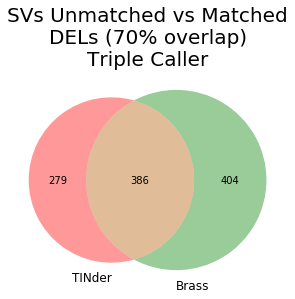

In [693]:
venn2(subsets = (279,404,386), set_labels = ('TINder', 'Brass'))
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDELs (70% overlap)\nTriple Caller',fontsize=20)
plt.show()

- Scores: 
    - 162/279 (58%) in only TINder and 200/386 (52%) in common have duphold<0.7 in TINder.
    - 162/279 (58%) in only TINder and 303/369 (82%) in common have brass>10 in TINder.
    - 391/404 (97%) in only Triple and 368/386 (95%) in common have at least one caller with score>10.
    - 165/404 (41%) in only Triple and 195/386 (51%) in common have  brass>10 in Triple.

#### - Brass score >10:

In [689]:
print(tinder_full_set_DEL_DETECT.shape)
tinder_full_set_DEL_DETECT.head(1)

(648, 13)


,chr1,start1,start2,SV length,brass_score,SV type,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF,keys,Detection
0,14,49067539,49429619,362080.0,61.0,DEL,IID_H158604_T01_01_WG01,0.842466,0.0,-1,-1.0,14_49067539_49429619_IID_H158604_T01_01_WG01,Non Detected


In [684]:
tinder_full_set_DEL_DETECT_score=tinder_full_set_DEL_DETECT[tinder_full_set_DEL_DETECT['brass_score']>=10]
print(tinder_full_set_DEL_DETECT_score.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_DEL_DETECT_score.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(465, 13)
303 162


In [690]:
print(triple_full_info_dup_DEL_DETECT.shape)
triple_full_info_dup_DEL_DETECT.head(1)

(790, 11)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD,keys,Detection
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,0,8,12_110895557_110907163_IID_H158612_T01_01_WG01,Detected


In [688]:
triple_full_info_dup_DEL_DETECT['brass_RC']=triple_full_info_dup_DEL_DETECT['brass_RC'].map(int)
triple_full_info_dup_DEL_DETECT['gridss_VF']=triple_full_info_dup_DEL_DETECT['gridss_VF'].map(int)
triple_full_info_dup_DEL_DETECT['svaba_AD']=triple_full_info_dup_DEL_DETECT['svaba_AD'].map(int)

triple_full_info_dup_DEL_DETECT_score=triple_full_info_dup_DEL_DETECT[(triple_full_info_dup_DEL_DETECT['brass_RC']>=10) | (triple_full_info_dup_DEL_DETECT['gridss_VF']>=10) | (triple_full_info_dup_DEL_DETECT['svaba_AD']>=10)]

print(triple_full_info_dup_DEL_DETECT_score.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_DEL_DETECT_score.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(759, 11)
368 391


In [697]:
triple_full_info_dup_DEL_DETECT['brass_RC']=triple_full_info_dup_DEL_DETECT['brass_RC'].map(int)
#triple_full_info_dup_DEL_DETECT['gridss_VF']=triple_full_info_dup_DEL_DETECT['gridss_VF'].map(int)
#triple_full_info_dup_DEL_DETECT['svaba_AD']=triple_full_info_dup_DEL_DETECT['svaba_AD'].map(int)

triple_full_info_dup_DEL_DETECT_scorebrass=triple_full_info_dup_DEL_DETECT[(triple_full_info_dup_DEL_DETECT['brass_RC']>=10)]

print(triple_full_info_dup_DEL_DETECT_scorebrass.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_DEL_DETECT_scorebrass.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(360, 11)
195 165


#### - Duphold:

In [700]:
tinder_full_set_DEL_DETECT_dh=tinder_full_set_DEL_DETECT[tinder_full_set_DEL_DETECT['DHFFC']<=0.7]
print(tinder_full_set_DEL_DETECT_dh.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_DEL_DETECT_dh.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(362, 13)
200 162


### B) Intersection Duplication:

In [511]:
tinder_full_set_DUP=tinder_full_set[tinder_full_set['SV type']=='DUP']
tinder_full_set_DUP_2intersect=tinder_full_set_DUP[['chr1','start1','start2','SV length','brass_score','SV type','Sample','DHFFC','blacklist','GD_AF','GD_POPMAX_AF']]
#tinder_full_DEL_2intersect=tinder_full_DEL[['chr1','start1','start2','SV length','brass_score','SV type','DHFC','DHFFC','DHBFC','blacklist','Sample']]

tinder_full_set_DUP_2intersect['brass_score']=tinder_full_set_DUP_2intersect['brass_score'].map(int)
tinder_full_set_DUP_2intersect['SV length']=tinder_full_set_DUP_2intersect['SV length'].map(int)
tinder_full_set_DUP_2intersect['blacklist']=tinder_full_set_DUP_2intersect['blacklist'].map(int)
tinder_full_set_DUP_2intersect['DHFFC']=tinder_full_set_DUP_2intersect['DHFFC'].map(str)
tinder_full_set_DUP_2intersect['GD_AF']=tinder_full_set_DUP_2intersect['GD_AF'].map(str)
tinder_full_set_DUP_2intersect['GD_POPMAX_AF']=tinder_full_set_DUP_2intersect['GD_POPMAX_AF'].map(str)


#tinder_full_DEL_2intersect['start1']=tinder_full_DEL_2intersect['start1'].map(int)

print(tinder_full_set_DUP_2intersect.shape)
tinder_full_set_DUP_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

(346, 11)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be s

,chr1,start1,start2,SV length,brass_score,SV type,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF
10,10,120303653,120305643,1990,30,DUP,IID_H158604_T01_01_WG01,1.05263,0,-1,-1.0
11,8,83891489,83893302,1813,26,DUP,IID_H158604_T01_01_WG01,1.0126600000000001,0,9.7999996796716e-05,0.00044900001375935993
22,17,34568338,36387749,1819411,6,DUP,IID_H158604_T01_01_WG01,0.47435900000000003,0,-1,-1.0
50,19,9128741,9131744,3003,47,DUP,IID_H158605_T01_01_WG01,1.51389,0,0.005175999831408262,0.010683000087738
55,8,101179291,101181833,2542,41,DUP,IID_H158605_T01_01_WG01,1.38462,0,0.000977999996393919,0.00236900011077523


In [512]:
triple_full_info_dup.head(2)

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,0,8
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,14,9


In [513]:
triple_full_info_dup_DUP=triple_full_info_dup[triple_full_info_dup['SV type']=='DUP']
print(triple_full_info_dup_DUP.shape)
triple_full_info_dup_DUP.head()

(86, 9)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD
6,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,0,0,8
47,6,32452838,32512203,6_32452838_6_32512203_DUP_-+,DUP,IID_H158635_T01_01_WG01,0,0,14
151,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,11,67,26
155,2,204237518,204248875,2_204237518_2_204248875_DUP_-+,DUP,IID_H158632_T01_01_WG01,17,61,47
158,3,15596176,15601901,3_15596176_3_15601901_DUP_-+,DUP,IID_H158632_T01_01_WG01,28,70,39


In [514]:
triple_full_info_dup_DUP_2intersect=triple_full_info_dup_DUP.copy()
triple_full_info_dup_DUP_2intersect['keys']=triple_full_info_dup_DUP_2intersect['ID']+'_'+triple_full_info_dup_DUP_2intersect['Sample']

triple_full_info_dup_DUP_2intersect['to_index']=triple_full_info_dup_DUP_2intersect['keys']
triple_full_info_dup_DUP_2intersect.index = triple_full_info_dup_DUP_2intersect['to_index']
triple_full_info_dup_DUP_2intersect=triple_full_info_dup_DUP_2intersect[['SV chrom','SV start','SV end','ID','SV type','Sample','brass_RC','gridss_VF','svaba_AD']]
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
triple_full_info_dup_DUP_2intersect.head()

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD
to_index,,,,,,,,,
12_95588243_12_95589486_DUP_-+_IID_H158635_T01_01_WG01,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,0,0,8
6_32452838_6_32512203_DUP_-+_IID_H158635_T01_01_WG01,6,32452838,32512203,6_32452838_6_32512203_DUP_-+,DUP,IID_H158635_T01_01_WG01,0,0,14
2_204224087_2_204237921_DUP_-+_IID_H158632_T01_01_WG01,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,11,67,26
2_204237518_2_204248875_DUP_-+_IID_H158632_T01_01_WG01,2,204237518,204248875,2_204237518_2_204248875_DUP_-+,DUP,IID_H158632_T01_01_WG01,17,61,47
3_15596176_3_15601901_DUP_-+_IID_H158632_T01_01_WG01,3,15596176,15601901,3_15596176_3_15601901_DUP_-+,DUP,IID_H158632_T01_01_WG01,28,70,39


In [516]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(tinder_full_set_DUP_2intersect.values.tolist())
list_bed_cytobands=BedTool(triple_full_info_dup_DUP_2intersect.values.tolist())

I_duplications = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','size','brass score','SVtype','Sample','DHFFC','blacklist','GD_AF','GD_POPMAX_AF','chr_band', 'start_band', 'end_band','ID','SV type','Sample','brass_RC','gridss_VF','svaba_AD'])
#I = I[I.chr_band!="X"]
print(I_duplications.shape)
I_duplications.head()

(511, 20)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,chr_seg,start_seg,end_seg,size,brass score,SVtype,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_RC,gridss_VF,svaba_AD
0,14,106382715,106552282,169567,34,DUP,IID_H158605_T01_01_WG01,1.66667,0,0.0010760000441223383,0.001553,14,106382716,106552283,14_106382716_14_106552283_DUP_-+,DUP,IID_H158605_T01_01_WG01,10,46,46
1,14,106382715,106552282,169567,34,DUP,IID_H158605_T01_01_WG01,1.66667,0,0.0010760000441223383,0.001553,14,106478109,107048698,14_106478109_14_107048698_DUP_-+,DUP,IID_H158622_T01_01_WG01,18,0,57
2,11,77932828,77939620,6792,21,DUP,IID_H158606_T01_01_WG01,1.17949,0,-1,-1.000000,11,77932829,77939621,11_77932829_11_77939621_DUP_-+,DUP,IID_H158606_T01_01_WG01,7,29,25
3,11,77932828,77939620,6792,21,DUP,IID_H158606_T01_01_WG01,1.17949,0,-1,-1.000000,11,36492836,106436144,11_36492836_11_106436144_DUP_-+,DUP,IID_H158638_T01_01_WG01,0,11,10
4,6,25909420,25913761,4341,8,DUP,IID_H158606_T01_01_WG01,1.15068,0,-1,-1.000000,6,25909421,25913762,6_25909421_6_25913762_DUP_-+,DUP,IID_H158606_T01_01_WG01,4,11,0


In [517]:
I_duplications_PATIENT=I_duplications[I_duplications['Sample']==I_duplications['Sample.1']]

keys=[]
for index,row in I_duplications_PATIENT.iterrows():
    keys.append(str(row['chr_seg'])+'_'+str(row['start_seg'])+'_'+str(row['end_seg'])+'_'+row['Sample'])
I_duplications_PATIENT['keys']=keys

print(I_duplications_PATIENT.shape)
print(len(I_duplications_PATIENT['keys'].unique()))
I_duplications_PATIENT.head(7)

(249, 21)
82


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,chr_seg,start_seg,end_seg,size,brass score,SVtype,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_RC,gridss_VF,svaba_AD,keys
0,14,106382715,106552282,169567,34,DUP,IID_H158605_T01_01_WG01,1.66667,0,0.0010760000441223383,0.001553,14,106382716,106552283,14_106382716_14_106552283_DUP_-+,DUP,IID_H158605_T01_01_WG01,10,46,46,14_106382715_106552282_IID_H158605_T01_01_WG01
2,11,77932828,77939620,6792,21,DUP,IID_H158606_T01_01_WG01,1.17949,0,-1,-1.000000,11,77932829,77939621,11_77932829_11_77939621_DUP_-+,DUP,IID_H158606_T01_01_WG01,7,29,25,11_77932828_77939620_IID_H158606_T01_01_WG01
4,6,25909420,25913761,4341,8,DUP,IID_H158606_T01_01_WG01,1.15068,0,-1,-1.000000,6,25909421,25913762,6_25909421_6_25913762_DUP_-+,DUP,IID_H158606_T01_01_WG01,4,11,0,6_25909420_25913761_IID_H158606_T01_01_WG01
7,2,89161440,89214586,53146,48,DUP,IID_H158608_T01_01_WG01,5.25000,0,4.70000013592653e-05,0.000561,2,89161441,89214587,2_89161441_2_89214587_DUP_-+,DUP,IID_H158608_T01_01_WG01,23,63,30,2_89161440_89214586_IID_H158608_T01_01_WG01
9,12,115909572,115910798,1226,29,DUP,IID_H158608_T01_01_WG01,1.31250,0,-1,-1.000000,12,115909573,115910799,12_115909573_12_115910799_DUP_-+,DUP,IID_H158608_T01_01_WG01,16,46,44,12_115909572_115910798_IID_H158608_T01_01_WG01
25,22,41343924,47349510,6005586,37,DUP,IID_H158613_T01_01_WG01,1.09877,0,-1,-1.000000,22,41343925,47349511,22_41343925_22_47349511_DUP_-+,DUP,IID_H158613_T01_01_WG01,17,45,24,22_41343924_47349510_IID_H158613_T01_01_WG01
26,22,18162699,38953658,20790959,34,DUP,IID_H158613_T01_01_WG01,1.02222,0,-1,-1.000000,22,18113784,40429270,22_18113784_22_40429270_DUP_-+,DUP,IID_H158613_T01_01_WG01,11,41,20,22_18162699_38953658_IID_H158613_T01_01_WG01


- Overlapping of deletions around 70%:

In [518]:
I_duplications_PATIENT['start_seg']=I_duplications_PATIENT['start_seg'].astype(int)
I_duplications_PATIENT['end_seg']=I_duplications_PATIENT['end_seg'].astype(int)
I_duplications_PATIENT['start_band']=I_duplications_PATIENT['start_band'].astype(int)
I_duplications_PATIENT['end_band']=I_duplications_PATIENT['end_band'].astype(int) 

I_duplications_70_PATIENT=[]
for index,row in I_duplications_PATIENT.iterrows():
    del_size=row['end_seg']-row['start_seg']
    
    # 1. Cases in which the segment starts after the beginning of the arm and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_duplications_70_PATIENT.append(row)
            
    # 2. Cases in which the segment starts before the beginning of the arm and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] > row['end_seg']) & (row['start_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(del_size*0.7<segment_size):
            I_duplications_70_PATIENT.append(row)

    # 3. Cases in which the segment starts after the beginning of the arm and finishes after the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] > row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(del_size*0.7<segment_size):
            I_duplications_70_PATIENT.append(row)
        
    # 4. Cases in which the segment starts before the beginning of the arm and finishes after the end
    if ((row['start_band'] > row['start_seg']) & (row['end_band'] < row['end_seg'])):
        segment_size=row['end_band']-row['start_band']
        if((del_size*0.7)<segment_size):
            I_duplications_70_PATIENT.append(row)
   

I_duplications_70_PATIENT=pd.DataFrame(I_duplications_70_PATIENT)
print(I_duplications_70_PATIENT.shape)
print(len(I_duplications_70_PATIENT['keys'].unique()))
I_duplications_70_PATIENT.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A val

(145, 21)
78


,chr_seg,start_seg,end_seg,size,brass score,SVtype,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_RC,gridss_VF,svaba_AD,keys
0,14,106382715,106552282,169567,34,DUP,IID_H158605_T01_01_WG01,1.66667,0,0.0010760000441223383,0.001553,14,106382716,106552283,14_106382716_14_106552283_DUP_-+,DUP,IID_H158605_T01_01_WG01,10,46,46,14_106382715_106552282_IID_H158605_T01_01_WG01
2,11,77932828,77939620,6792,21,DUP,IID_H158606_T01_01_WG01,1.17949,0,-1,-1.000000,11,77932829,77939621,11_77932829_11_77939621_DUP_-+,DUP,IID_H158606_T01_01_WG01,7,29,25,11_77932828_77939620_IID_H158606_T01_01_WG01
4,6,25909420,25913761,4341,8,DUP,IID_H158606_T01_01_WG01,1.15068,0,-1,-1.000000,6,25909421,25913762,6_25909421_6_25913762_DUP_-+,DUP,IID_H158606_T01_01_WG01,4,11,0,6_25909420_25913761_IID_H158606_T01_01_WG01
7,2,89161440,89214586,53146,48,DUP,IID_H158608_T01_01_WG01,5.25000,0,4.70000013592653e-05,0.000561,2,89161441,89214587,2_89161441_2_89214587_DUP_-+,DUP,IID_H158608_T01_01_WG01,23,63,30,2_89161440_89214586_IID_H158608_T01_01_WG01
9,12,115909572,115910798,1226,29,DUP,IID_H158608_T01_01_WG01,1.31250,0,-1,-1.000000,12,115909573,115910799,12_115909573_12_115910799_DUP_-+,DUP,IID_H158608_T01_01_WG01,16,46,44,12_115909572_115910798_IID_H158608_T01_01_WG01


- Detected/NonDetected:

In [520]:
tinder_full_set_DUP_DETECT=tinder_full_set_DUP[['chr1','start1','start2','SV length','brass_score','SV type','Sample','DHFFC','blacklist','GD_AF','GD_POPMAX_AF']]

#keys
keys=[]
for index,row in tinder_full_set_DUP_DETECT.iterrows():
    keys.append(str(row['chr1'])+'_'+str(row['start1'])+'_'+str(row['start2'])+'_'+row['Sample'])
    
tinder_full_set_DUP_DETECT['keys']=keys

tinder_full_set_DUP_DETECT.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,chr1,start1,start2,SV length,brass_score,SV type,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF,keys
10,10,120303653,120305643,1990.0,30.0,DUP,IID_H158604_T01_01_WG01,1.052630,0.0,-1,-1.000000,10_120303653_120305643_IID_H158604_T01_01_WG01
11,8,83891489,83893302,1813.0,26.0,DUP,IID_H158604_T01_01_WG01,1.012660,0.0,9.7999996796716e-05,0.000449,8_83891489_83893302_IID_H158604_T01_01_WG01
22,17,34568338,36387749,1819411.0,6.0,DUP,IID_H158604_T01_01_WG01,0.474359,0.0,-1,-1.000000,17_34568338_36387749_IID_H158604_T01_01_WG01
50,19,9128741,9131744,3003.0,47.0,DUP,IID_H158605_T01_01_WG01,1.513890,0.0,0.005175999831408262,0.010683,19_9128741_9131744_IID_H158605_T01_01_WG01
55,8,101179291,101181833,2542.0,41.0,DUP,IID_H158605_T01_01_WG01,1.384620,0.0,0.000977999996393919,0.002369,8_101179291_101181833_IID_H158605_T01_01_WG01


In [521]:
detection=[]
for index,row in tinder_full_set_DUP_DETECT.iterrows():
    if (str(row['keys']) in I_duplications_70_PATIENT['keys'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
tinder_full_set_DUP_DETECT['Detection']=detection
tinder_full_set_DUP_DETECT[tinder_full_set_DUP_DETECT['Detection']=='Detected'].head()

346


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,chr1,start1,start2,SV length,brass_score,SV type,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF,keys,Detection
60,14,106382715,106552282,169567.0,34.0,DUP,IID_H158605_T01_01_WG01,1.66667,0.0,0.0010760000441223383,0.001553,14_106382715_106552282_IID_H158605_T01_01_WG01,Detected
120,11,77932828,77939620,6792.0,21.0,DUP,IID_H158606_T01_01_WG01,1.17949,0.0,-1,-1.000000,11_77932828_77939620_IID_H158606_T01_01_WG01,Detected
130,6,25909420,25913761,4341.0,8.0,DUP,IID_H158606_T01_01_WG01,1.15068,0.0,-1,-1.000000,6_25909420_25913761_IID_H158606_T01_01_WG01,Detected
235,2,89161440,89214586,53146.0,48.0,DUP,IID_H158608_T01_01_WG01,5.25000,0.0,4.70000013592653e-05,0.000561,2_89161440_89214586_IID_H158608_T01_01_WG01,Detected
243,12,115909572,115910798,1226.0,29.0,DUP,IID_H158608_T01_01_WG01,1.31250,0.0,-1,-1.000000,12_115909572_115910798_IID_H158608_T01_01_WG01,Detected


In [522]:
print(tinder_full_set_DUP_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_DUP_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(346, 13)
78 268


### 1.2) Precision: TripleCaller calls in TINder: yellow and green areas

In [573]:
tinder_full_set_DUP=tinder_full_set[tinder_full_set['SV type']=='DUP']
tinder_full_set_DUP_2intersect=tinder_full_set_DUP[['chr1','start1','start2','SV length','brass_score','SV type','Sample','DHFFC','blacklist','GD_AF','GD_POPMAX_AF']]
#tinder_full_DEL_2intersect=tinder_full_DEL[['chr1','start1','start2','SV length','brass_score','SV type','DHFC','DHFFC','DHBFC','blacklist','Sample']]

tinder_full_set_DUP_2intersect['brass_score']=tinder_full_set_DUP_2intersect['brass_score'].map(int)
tinder_full_set_DUP_2intersect['SV length']=tinder_full_set_DUP_2intersect['SV length'].map(int)
tinder_full_set_DUP_2intersect['blacklist']=tinder_full_set_DUP_2intersect['blacklist'].map(int)
tinder_full_set_DUP_2intersect['DHFFC']=tinder_full_set_DUP_2intersect['DHFFC'].map(str)
tinder_full_set_DUP_2intersect['GD_AF']=tinder_full_set_DUP_2intersect['GD_AF'].map(str)
tinder_full_set_DUP_2intersect['GD_POPMAX_AF']=tinder_full_set_DUP_2intersect['GD_POPMAX_AF'].map(str)


#tinder_full_DEL_2intersect['start1']=tinder_full_DEL_2intersect['start1'].map(int)

print(tinder_full_set_DUP_2intersect.shape)
tinder_full_set_DUP_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

(346, 11)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be s

,chr1,start1,start2,SV length,brass_score,SV type,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF
10,10,120303653,120305643,1990,30,DUP,IID_H158604_T01_01_WG01,1.05263,0,-1,-1.0
11,8,83891489,83893302,1813,26,DUP,IID_H158604_T01_01_WG01,1.0126600000000001,0,9.7999996796716e-05,0.00044900001375935993
22,17,34568338,36387749,1819411,6,DUP,IID_H158604_T01_01_WG01,0.47435900000000003,0,-1,-1.0
50,19,9128741,9131744,3003,47,DUP,IID_H158605_T01_01_WG01,1.51389,0,0.005175999831408262,0.010683000087738
55,8,101179291,101181833,2542,41,DUP,IID_H158605_T01_01_WG01,1.38462,0,0.000977999996393919,0.00236900011077523


In [574]:
tinder_full_set_DUP_2intersect
#keys
keys=[]
for index,row in tinder_full_set_DUP_2intersect.iterrows():
    keys.append(str(row['chr1'])+'_'+str(row['start1'])+'_'+str(row['start2'])+'_'+row['Sample'])
tinder_full_set_DUP_2intersect['keys']=keys
tinder_full_set_DUP_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,chr1,start1,start2,SV length,brass_score,SV type,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF,keys
10,10,120303653,120305643,1990,30,DUP,IID_H158604_T01_01_WG01,1.05263,0,-1,-1.0,10_120303653_120305643_IID_H158604_T01_01_WG01
11,8,83891489,83893302,1813,26,DUP,IID_H158604_T01_01_WG01,1.0126600000000001,0,9.7999996796716e-05,0.00044900001375935993,8_83891489_83893302_IID_H158604_T01_01_WG01
22,17,34568338,36387749,1819411,6,DUP,IID_H158604_T01_01_WG01,0.47435900000000003,0,-1,-1.0,17_34568338_36387749_IID_H158604_T01_01_WG01
50,19,9128741,9131744,3003,47,DUP,IID_H158605_T01_01_WG01,1.51389,0,0.005175999831408262,0.010683000087738,19_9128741_9131744_IID_H158605_T01_01_WG01
55,8,101179291,101181833,2542,41,DUP,IID_H158605_T01_01_WG01,1.38462,0,0.000977999996393919,0.00236900011077523,8_101179291_101181833_IID_H158605_T01_01_WG01


In [575]:
tinder_full_set_DUP_2intersect2=tinder_full_set_DUP_2intersect.copy()
tinder_full_set_DUP_2intersect2['to_index']=tinder_full_set_DUP_2intersect['keys']
tinder_full_set_DUP_2intersect2.index = tinder_full_set_DUP_2intersect2['to_index']
tinder_full_set_DUP_2intersect2=tinder_full_set_DUP_2intersect2[['chr1','start1','start2','SV length','brass_score','SV type','Sample','DHFFC','GD_POPMAX_AF','keys']]
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
tinder_full_set_DUP_2intersect2.head()

,chr1,start1,start2,SV length,brass_score,SV type,Sample,DHFFC,GD_POPMAX_AF,keys
to_index,,,,,,,,,,
10_120303653_120305643_IID_H158604_T01_01_WG01,10,120303653,120305643,1990,30,DUP,IID_H158604_T01_01_WG01,1.05263,-1.0,10_120303653_120305643_IID_H158604_T01_01_WG01
8_83891489_83893302_IID_H158604_T01_01_WG01,8,83891489,83893302,1813,26,DUP,IID_H158604_T01_01_WG01,1.0126600000000001,0.00044900001375935993,8_83891489_83893302_IID_H158604_T01_01_WG01
17_34568338_36387749_IID_H158604_T01_01_WG01,17,34568338,36387749,1819411,6,DUP,IID_H158604_T01_01_WG01,0.47435900000000003,-1.0,17_34568338_36387749_IID_H158604_T01_01_WG01
19_9128741_9131744_IID_H158605_T01_01_WG01,19,9128741,9131744,3003,47,DUP,IID_H158605_T01_01_WG01,1.51389,0.010683000087738,19_9128741_9131744_IID_H158605_T01_01_WG01
8_101179291_101181833_IID_H158605_T01_01_WG01,8,101179291,101181833,2542,41,DUP,IID_H158605_T01_01_WG01,1.38462,0.00236900011077523,8_101179291_101181833_IID_H158605_T01_01_WG01


In [576]:
print(triple_full_info_dup_DUP.shape)
triple_full_info_dup_DUP.head(2)

(86, 9)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD
6,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,0,0,8
47,6,32452838,32512203,6_32452838_6_32512203_DUP_-+,DUP,IID_H158635_T01_01_WG01,0,0,14


In [577]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(triple_full_info_dup_DUP.values.tolist())
list_bed_cytobands=BedTool(tinder_full_set_DUP_2intersect2.values.tolist())

I_duplications_TC = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg', 'end_seg','ID','SV type','Sample','brass_RC','gridss_VF','svaba_AD','chr_band', 'start_band','end_band','size','brass score','SVtype','Sample','DHFFC','GD_POPMAX_AF','keys'])
#I = I[I.chr_band!="X"]
print(I_deletions_TC.shape)
I_duplications_TC.head()

(7429, 19)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,brass score,SVtype,Sample.1,DHFFC,GD_POPMAX_AF,keys
0,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,0,0,8,12,69547373,118732988,49185615,29,DUP,IID_H158639_T01_01_WG01,0.965116,-1.0,12_69547373_118732988_IID_H158639_T01_01_WG01
1,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,0,0,8,12,69547371,118732988,49185617,17,DUP,IID_H158671_T01_01_WG01,1.015150,-1.0,12_69547371_118732988_IID_H158671_T01_01_WG01
2,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,0,0,8,12,25956276,104359836,78403560,20,DUP,IID_H158644_T01_01_WG01,0.974684,-1.0,12_25956276_104359836_IID_H158644_T01_01_WG01
3,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,0,0,8,12,25956258,104359761,78403503,16,DUP,IID_H158668_T01_01_WG01,0.955882,-1.0,12_25956258_104359761_IID_H158668_T01_01_WG01
4,6,32452838,32512203,6_32452838_6_32512203_DUP_-+,DUP,IID_H158635_T01_01_WG01,0,0,14,6,32450724,32558180,107456,42,DUP,IID_H158618_T01_01_WG01,0.714286,-1.0,6_32450724_32558180_IID_H158618_T01_01_WG01


In [580]:
I_duplications_TC_PATIENT=I_duplications_TC[I_duplications_TC['Sample']==I_duplications_TC['Sample.1']]

keys=[]
for index,row in I_duplications_TC_PATIENT.iterrows():
    keys.append(str(row['chr_seg'])+'_'+str(row['start_seg'])+'_'+str(row['end_seg'])+'_'+row['Sample'])
I_duplications_TC_PATIENT['keys']=keys

print(I_duplications_TC_PATIENT.shape)
print(len(I_duplications_TC_PATIENT['keys'].unique()))
I_duplications_TC_PATIENT.head()

(249, 19)
69


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,brass score,SVtype,Sample.1,DHFFC,GD_POPMAX_AF,keys
11,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,11,67,26,2,204237517,204248874,11357,27,DUP,IID_H158632_T01_01_WG01,1.18447,-1.0,2_204224087_204237921_IID_H158632_T01_01_WG01
12,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,11,67,26,2,204224086,204237978,13892,25,DUP,IID_H158632_T01_01_WG01,1.01053,-1.0,2_204224087_204237921_IID_H158632_T01_01_WG01
13,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,11,67,26,2,204224086,204248874,24788,10,DUP,IID_H158632_T01_01_WG01,1.52000,-1.0,2_204224087_204237921_IID_H158632_T01_01_WG01
16,2,204237518,204248875,2_204237518_2_204248875_DUP_-+,DUP,IID_H158632_T01_01_WG01,17,61,47,2,204237517,204248874,11357,27,DUP,IID_H158632_T01_01_WG01,1.18447,-1.0,2_204237518_204248875_IID_H158632_T01_01_WG01
17,2,204237518,204248875,2_204237518_2_204248875_DUP_-+,DUP,IID_H158632_T01_01_WG01,17,61,47,2,204224086,204237978,13892,25,DUP,IID_H158632_T01_01_WG01,1.01053,-1.0,2_204237518_204248875_IID_H158632_T01_01_WG01


- Overlapping of deletions around 70%:

In [586]:
I_duplications_TC_PATIENT['start_seg']=I_duplications_TC_PATIENT['start_seg'].astype(int)
I_duplications_TC_PATIENT['end_seg']=I_duplications_TC_PATIENT['end_seg'].astype(int)
I_duplications_TC_PATIENT['start_band']=I_duplications_TC_PATIENT['start_band'].astype(int)
I_duplications_TC_PATIENT['end_band']=I_duplications_TC_PATIENT['end_band'].astype(int) 

I_duplications_TC_70_PATIENT=[]
for index,row in I_duplications_TC_PATIENT.iterrows():
    del_size=row['end_seg']-row['start_seg']
    
    # 1. Cases in which the segment starts after the beginning of the arm and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_duplications_TC_70_PATIENT.append(row)
        
            
    # 2. Cases in which the segment starts before the beginning of the arm and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] > row['end_seg']) & (row['start_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(del_size*0.7<segment_size):
            I_duplications_TC_70_PATIENT.append(row)
            

    # 3. Cases in which the segment starts after the beginning of the arm and finishes after the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] > row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(del_size*0.7<segment_size):
            I_duplications_TC_70_PATIENT.append(row)
            
        
    # 4. Cases in which the segment starts before the beginning of the arm and finishes after the end
    if ((row['start_band'] > row['start_seg']) & (row['end_band'] < row['end_seg'])):
        segment_size=row['end_band']-row['start_band']
        if((del_size*0.7)<segment_size):
            I_duplications_TC_70_PATIENT.append(row)            
   

I_duplications_TC_70_PATIENT=pd.DataFrame(I_duplications_TC_70_PATIENT)
print(I_duplications_TC_70_PATIENT.shape)
print(len(I_duplications_TC_70_PATIENT['keys'].unique()))
I_duplications_TC_70_PATIENT.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A val

(133, 19)
65


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,brass score,SVtype,Sample.1,DHFFC,GD_POPMAX_AF,keys
12,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,11,67,26,2,204224086,204237978,13892,25,DUP,IID_H158632_T01_01_WG01,1.01053,-1.000000,2_204224087_204237921_IID_H158632_T01_01_WG01
13,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,11,67,26,2,204224086,204248874,24788,10,DUP,IID_H158632_T01_01_WG01,1.52000,-1.000000,2_204224087_204237921_IID_H158632_T01_01_WG01
16,2,204237518,204248875,2_204237518_2_204248875_DUP_-+,DUP,IID_H158632_T01_01_WG01,17,61,47,2,204237517,204248874,11357,27,DUP,IID_H158632_T01_01_WG01,1.18447,-1.000000,2_204237518_204248875_IID_H158632_T01_01_WG01
18,2,204237518,204248875,2_204237518_2_204248875_DUP_-+,DUP,IID_H158632_T01_01_WG01,17,61,47,2,204224086,204248874,24788,10,DUP,IID_H158632_T01_01_WG01,1.52000,-1.000000,2_204237518_204248875_IID_H158632_T01_01_WG01
21,3,15596176,15601901,3_15596176_3_15601901_DUP_-+,DUP,IID_H158632_T01_01_WG01,28,70,39,3,15596175,15601899,5724,55,DUP,IID_H158632_T01_01_WG01,1.56627,0.000754,3_15596176_15601901_IID_H158632_T01_01_WG01


- Detected/NonDetected:

In [587]:
triple_full_info_dup_DUP.head()

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD
6,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,0,0,8
47,6,32452838,32512203,6_32452838_6_32512203_DUP_-+,DUP,IID_H158635_T01_01_WG01,0,0,14
151,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,11,67,26
155,2,204237518,204248875,2_204237518_2_204248875_DUP_-+,DUP,IID_H158632_T01_01_WG01,17,61,47
158,3,15596176,15601901,3_15596176_3_15601901_DUP_-+,DUP,IID_H158632_T01_01_WG01,28,70,39


In [588]:
triple_full_info_dup_DUP_DETECT=triple_full_info_dup_DUP.copy()
keys=[]
for index,row in triple_full_info_dup_DUP_DETECT.iterrows():
    keys.append(str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV end'])+'_'+row['Sample'])
triple_full_info_dup_DUP_DETECT['keys']=keys
triple_full_info_dup_DUP_DETECT.head()

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD,keys
6,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,0,0,8,12_95588243_95589486_IID_H158635_T01_01_WG01
47,6,32452838,32512203,6_32452838_6_32512203_DUP_-+,DUP,IID_H158635_T01_01_WG01,0,0,14,6_32452838_32512203_IID_H158635_T01_01_WG01
151,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,11,67,26,2_204224087_204237921_IID_H158632_T01_01_WG01
155,2,204237518,204248875,2_204237518_2_204248875_DUP_-+,DUP,IID_H158632_T01_01_WG01,17,61,47,2_204237518_204248875_IID_H158632_T01_01_WG01
158,3,15596176,15601901,3_15596176_3_15601901_DUP_-+,DUP,IID_H158632_T01_01_WG01,28,70,39,3_15596176_15601901_IID_H158632_T01_01_WG01


In [589]:
detection=[]
for index,row in triple_full_info_dup_DUP_DETECT.iterrows():
    if (str(row['keys']) in I_duplications_TC_70_PATIENT['keys'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
triple_full_info_dup_DUP_DETECT['Detection']=detection
triple_full_info_dup_DUP_DETECT[triple_full_info_dup_DUP_DETECT['Detection']=='Detected'].head()

86


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD,keys,Detection
151,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,11,67,26,2_204224087_204237921_IID_H158632_T01_01_WG01,Detected
155,2,204237518,204248875,2_204237518_2_204248875_DUP_-+,DUP,IID_H158632_T01_01_WG01,17,61,47,2_204237518_204248875_IID_H158632_T01_01_WG01,Detected
158,3,15596176,15601901,3_15596176_3_15601901_DUP_-+,DUP,IID_H158632_T01_01_WG01,28,70,39,3_15596176_15601901_IID_H158632_T01_01_WG01,Detected
568,9,21191503,32532021,9_21191503_9_32532021_DUP_-+,DUP,IID_H158625_T01_01_WG01,19,58,43,9_21191503_32532021_IID_H158625_T01_01_WG01,Detected
662,9,32341087,32345901,9_32341087_9_32345901_DUP_-+,DUP,IID_H158625_T01_01_WG01,26,75,60,9_32341087_32345901_IID_H158625_T01_01_WG01,Detected


In [590]:
print(triple_full_info_dup_DUP_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_DUP_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(86, 11)
65 21


In [591]:
print(tinder_full_set_DUP_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_DUP_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(346, 13)
78 268


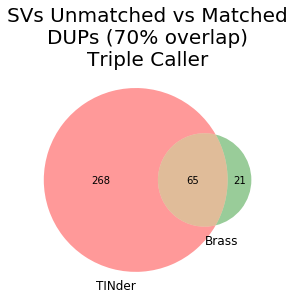

In [622]:
venn2(subsets = (268,21,65), set_labels = ('TINder', 'Brass'))
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDUPs (70% overlap)\nTriple Caller',fontsize=20)
plt.show()

- Scores: 
    - 130/268 (49%) in only TINder and 24/65 (37%) in common have duphold>1.3 in TINder.
    - 165/268 (62%) in only TINder and 56/65 (86%) in common have brass>10 in TINder.
    - 19/21 (90%) in only Triple and 61/65 (94%) in common have at least one caller with score>10.
    - 5/21 (24%) in only Triple and 30/65 (46%) in common have  brass>10 in Triple.

#### - Brass score >10:

In [703]:
print(tinder_full_set_DUP_DETECT.shape)
tinder_full_set_DUP_DETECT.head(1)

(346, 13)


,chr1,start1,start2,SV length,brass_score,SV type,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF,keys,Detection
10,10,120303653,120305643,1990.0,30.0,DUP,IID_H158604_T01_01_WG01,1.05263,0.0,-1,-1.0,10_120303653_120305643_IID_H158604_T01_01_WG01,Non Detected


In [704]:
tinder_full_set_DUP_DETECT_score=tinder_full_set_DUP_DETECT[tinder_full_set_DUP_DETECT['brass_score']>=10]
print(tinder_full_set_DUP_DETECT_score.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_DUP_DETECT_score.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(221, 13)
56 165


In [705]:
print(triple_full_info_dup_DUP_DETECT.shape)
triple_full_info_dup_DUP_DETECT.head(1)

(86, 11)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD,keys,Detection
6,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,0,0,8,12_95588243_95589486_IID_H158635_T01_01_WG01,Non Detected


In [706]:
triple_full_info_dup_DUP_DETECT['brass_RC']=triple_full_info_dup_DUP_DETECT['brass_RC'].map(int)
triple_full_info_dup_DUP_DETECT['gridss_VF']=triple_full_info_dup_DUP_DETECT['gridss_VF'].map(int)
triple_full_info_dup_DUP_DETECT['svaba_AD']=triple_full_info_dup_DUP_DETECT['svaba_AD'].map(int)

triple_full_info_dup_DUP_DETECT_score=triple_full_info_dup_DUP_DETECT[(triple_full_info_dup_DUP_DETECT['brass_RC']>=10) | (triple_full_info_dup_DUP_DETECT['gridss_VF']>=10) | (triple_full_info_dup_DUP_DETECT['svaba_AD']>=10)]

print(triple_full_info_dup_DUP_DETECT_score.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_DUP_DETECT_score.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(80, 11)
61 19


In [707]:
triple_full_info_dup_DUP_DETECT['brass_RC']=triple_full_info_dup_DUP_DETECT['brass_RC'].map(int)
#triple_full_info_dup_DEL_DETECT['gridss_VF']=triple_full_info_dup_DEL_DETECT['gridss_VF'].map(int)
#triple_full_info_dup_DEL_DETECT['svaba_AD']=triple_full_info_dup_DEL_DETECT['svaba_AD'].map(int)

triple_full_info_dup_DUP_DETECT_scorebrass=triple_full_info_dup_DUP_DETECT[(triple_full_info_dup_DUP_DETECT['brass_RC']>=10)]

print(triple_full_info_dup_DUP_DETECT_scorebrass.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_DUP_DETECT_scorebrass.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(35, 11)
30 5


#### - Duphold:

In [710]:
tinder_full_set_DUP_DETECT_dh=tinder_full_set_DUP_DETECT[tinder_full_set_DUP_DETECT['DHFFC']>=1.3]
print(tinder_full_set_DUP_DETECT_dh.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_DUP_DETECT_dh.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(154, 13)
24 130


### C) Intersection Inversion:

In [596]:
tinder_full_set_INV=tinder_full_set[tinder_full_set['SV type']=='INV']
tinder_full_set_INV_2intersect=tinder_full_set_INV[['chr1','start1','start2','SV length','brass_score','SV type','Sample','DHFFC','blacklist','GD_AF','GD_POPMAX_AF']]
#tinder_full_DEL_2intersect=tinder_full_DEL[['chr1','start1','start2','SV length','brass_score','SV type','DHFC','DHFFC','DHBFC','blacklist','Sample']]

tinder_full_set_INV_2intersect['brass_score']=tinder_full_set_INV_2intersect['brass_score'].map(int)
tinder_full_set_INV_2intersect['SV length']=tinder_full_set_INV_2intersect['SV length'].map(int)
tinder_full_set_INV_2intersect['blacklist']=tinder_full_set_INV_2intersect['blacklist'].map(int)
tinder_full_set_INV_2intersect['DHFFC']=tinder_full_set_INV_2intersect['DHFFC'].map(str)
tinder_full_set_INV_2intersect['GD_AF']=tinder_full_set_INV_2intersect['GD_AF'].map(str)
tinder_full_set_INV_2intersect['GD_POPMAX_AF']=tinder_full_set_INV_2intersect['GD_POPMAX_AF'].map(str)


#tinder_full_DEL_2intersect['start1']=tinder_full_DEL_2intersect['start1'].map(int)

print(tinder_full_set_INV_2intersect.shape)
tinder_full_set_INV_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

(585, 11)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be s

,chr1,start1,start2,SV length,brass_score,SV type,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF
12,14,49407634,49461450,53816,21,INV,IID_H158604_T01_01_WG01,1.20652,0,-1,-1.0
19,X,6451509,8435430,1983921,6,INV,IID_H158604_T01_01_WG01,2.3529400000000003,2,-1,-1.0
51,9,12014639,12200279,185640,47,INV,IID_H158605_T01_01_WG01,0.933333,0,-1,-1.0
53,3,50170168,50171890,1722,46,INV,IID_H158605_T01_01_WG01,0.896552,0,-1,-1.0
54,3,50170155,50172448,2293,43,INV,IID_H158605_T01_01_WG01,0.9642860000000001,0,-1,-1.0


In [597]:
triple_full_info_dup.head(2)

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,0,8
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,14,9


In [598]:
triple_full_info_dup_INV=triple_full_info_dup[triple_full_info_dup['SV type']=='INV']
print(triple_full_info_dup_INV.shape)
triple_full_info_dup_INV.head()

(188, 9)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD
12,13,89110965,89112603,13_89110965_13_89112603_INV_--,INV,IID_H158635_T01_01_WG01,0,36,0
53,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,13,48,53
16,2,89160453,90249423,2_89160453_2_90249423_INV_++,INV,IID_H158609_T01_01_WG01,0,33,23
22,2,11317205,49115205,2_11317205_2_49115205_INV_--,INV,IID_H158625_T01_01_WG01,0,28,26
319,2,34040568,57113494,2_34040568_2_57113494_INV_++,INV,IID_H158625_T01_01_WG01,19,41,29


In [599]:
triple_full_info_dup_INV_2intersect=triple_full_info_dup_INV.copy()
triple_full_info_dup_INV_2intersect['keys']=triple_full_info_dup_INV_2intersect['ID']+'_'+triple_full_info_dup_INV_2intersect['Sample']

triple_full_info_dup_INV_2intersect['to_index']=triple_full_info_dup_INV_2intersect['keys']
triple_full_info_dup_INV_2intersect.index = triple_full_info_dup_INV_2intersect['to_index']
triple_full_info_dup_INV_2intersect=triple_full_info_dup_INV_2intersect[['SV chrom','SV start','SV end','ID','SV type','Sample','brass_RC','gridss_VF','svaba_AD']]
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
triple_full_info_dup_INV_2intersect.head()

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD
to_index,,,,,,,,,
13_89110965_13_89112603_INV_--_IID_H158635_T01_01_WG01,13,89110965,89112603,13_89110965_13_89112603_INV_--,INV,IID_H158635_T01_01_WG01,0,36,0
7_142190647_7_142494053_INV_--_IID_H158635_T01_01_WG01,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,13,48,53
2_89160453_2_90249423_INV_++_IID_H158609_T01_01_WG01,2,89160453,90249423,2_89160453_2_90249423_INV_++,INV,IID_H158609_T01_01_WG01,0,33,23
2_11317205_2_49115205_INV_--_IID_H158625_T01_01_WG01,2,11317205,49115205,2_11317205_2_49115205_INV_--,INV,IID_H158625_T01_01_WG01,0,28,26
2_34040568_2_57113494_INV_++_IID_H158625_T01_01_WG01,2,34040568,57113494,2_34040568_2_57113494_INV_++,INV,IID_H158625_T01_01_WG01,19,41,29


In [600]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(tinder_full_set_INV_2intersect.values.tolist())
list_bed_cytobands=BedTool(triple_full_info_dup_INV_2intersect.values.tolist())

I_inversions = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','size','brass score','SVtype','Sample','DHFFC','blacklist','GD_AF','GD_POPMAX_AF','chr_band', 'start_band', 'end_band','ID','SV type','Sample','brass_RC','gridss_VF','svaba_AD'])
#I = I[I.chr_band!="X"]
print(I_inversions.shape)
I_inversions.head()

(2508, 20)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,chr_seg,start_seg,end_seg,size,brass score,SVtype,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_RC,gridss_VF,svaba_AD
0,X,6451509,8435430,1983921,6,INV,IID_H158604_T01_01_WG01,2.35294,2,-1.0,-1.0,X,5302043,39105071,X_5302043_X_39105071_INV_++,INV,IID_H158613_T01_01_WG01,15,33,32
1,14,106385363,106552283,166920,35,INV,IID_H158605_T01_01_WG01,1.28571,0,-1.0,-1.0,14,106385364,106552284,14_106385364_14_106552284_INV_--,INV,IID_H158605_T01_01_WG01,20,54,51
2,14,106385363,106552283,166920,35,INV,IID_H158605_T01_01_WG01,1.28571,0,-1.0,-1.0,14,106552275,106602570,14_106552275_14_106602570_INV_++,INV,IID_H158611_T01_01_WG01,26,67,41
3,14,106385363,106552283,166920,35,INV,IID_H158605_T01_01_WG01,1.28571,0,-1.0,-1.0,14,106330846,107048644,14_106330846_14_107048644_INV_++,INV,IID_H158617_T01_01_WG01,0,35,0
4,14,106385363,106552283,166920,35,INV,IID_H158605_T01_01_WG01,1.28571,0,-1.0,-1.0,14,106370539,107048671,14_106370539_14_107048671_INV_--,INV,IID_H158617_T01_01_WG01,0,0,43


In [601]:
I_inversions_PATIENT=I_inversions[I_inversions['Sample']==I_inversions['Sample.1']]

keys=[]
for index,row in I_inversions_PATIENT.iterrows():
    keys.append(str(row['chr_seg'])+'_'+str(row['start_seg'])+'_'+str(row['end_seg'])+'_'+row['Sample'])
I_inversions_PATIENT['keys']=keys

print(I_inversions_PATIENT.shape)
print(len(I_inversions_PATIENT['keys'].unique()))
I_inversions_PATIENT.head(7)

(745, 21)
190


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,chr_seg,start_seg,end_seg,size,brass score,SVtype,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_RC,gridss_VF,svaba_AD,keys
1,14,106385363,106552283,166920,35,INV,IID_H158605_T01_01_WG01,1.285710,0,-1.0,-1.0,14,106385364,106552284,14_106385364_14_106552284_INV_--,INV,IID_H158605_T01_01_WG01,20,54,51,14_106385363_106552283_IID_H158605_T01_01_WG01
12,14,106329449,106385360,55911,23,INV,IID_H158605_T01_01_WG01,0.274510,0,-1.0,-1.0,14,106329450,106385361,14_106329450_14_106385361_INV_++,INV,IID_H158605_T01_01_WG01,15,49,24,14_106329449_106385360_IID_H158605_T01_01_WG01
24,14,106147903,106552282,404379,4,INV,IID_H158605_T01_01_WG01,0.981132,0,-1.0,-1.0,14,106329450,106385361,14_106329450_14_106385361_INV_++,INV,IID_H158605_T01_01_WG01,15,49,24,14_106147903_106552282_IID_H158605_T01_01_WG01
27,14,106147903,106552282,404379,4,INV,IID_H158605_T01_01_WG01,0.981132,0,-1.0,-1.0,14,106385364,106552284,14_106385364_14_106552284_INV_--,INV,IID_H158605_T01_01_WG01,20,54,51,14_106147903_106552282_IID_H158605_T01_01_WG01
66,14,106328719,106330841,2122,43,INV,IID_H158607_T01_01_WG01,1.633330,0,-1.0,-1.0,14,106328720,106330842,14_106328720_14_106330842_INV_++,INV,IID_H158607_T01_01_WG01,31,62,0,14_106328719_106330841_IID_H158607_T01_01_WG01
97,2,89197301,89214599,17298,37,INV,IID_H158608_T01_01_WG01,5.000000,0,-1.0,-1.0,2,89197302,89214600,2_89197302_2_89214600_INV_--,INV,IID_H158608_T01_01_WG01,18,62,58,2_89197301_89214599_IID_H158608_T01_01_WG01
122,2,83775002,198730893,114955891,4,INV,IID_H158608_T01_01_WG01,0.987805,0,-1.0,-1.0,2,89132284,89185668,2_89132284_2_89185668_INV_++,INV,IID_H158608_T01_01_WG01,28,72,50,2_83775002_198730893_IID_H158608_T01_01_WG01


- Overlapping of deletions around 70%:

In [602]:
I_inversions_PATIENT['start_seg']=I_inversions_PATIENT['start_seg'].astype(int)
I_inversions_PATIENT['end_seg']=I_inversions_PATIENT['end_seg'].astype(int)
I_inversions_PATIENT['start_band']=I_inversions_PATIENT['start_band'].astype(int)
I_inversions_PATIENT['end_band']=I_inversions_PATIENT['end_band'].astype(int) 

I_inversions_70_PATIENT=[]
for index,row in I_inversions_PATIENT.iterrows():
    del_size=row['end_seg']-row['start_seg']
    
    # 1. Cases in which the segment starts after the beginning of the arm and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_inversions_70_PATIENT.append(row)
            
    # 2. Cases in which the segment starts before the beginning of the arm and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] > row['end_seg']) & (row['start_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(del_size*0.7<segment_size):
            I_inversions_70_PATIENT.append(row)

    # 3. Cases in which the segment starts after the beginning of the arm and finishes after the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] > row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(del_size*0.7<segment_size):
            I_inversions_70_PATIENT.append(row)
        
    # 4. Cases in which the segment starts before the beginning of the arm and finishes after the end
    if ((row['start_band'] > row['start_seg']) & (row['end_band'] < row['end_seg'])):
        segment_size=row['end_band']-row['start_band']
        if((del_size*0.7)<segment_size):
            I_inversions_70_PATIENT.append(row)
   

I_inversions_70_PATIENT=pd.DataFrame(I_inversions_70_PATIENT)
print(I_inversions_70_PATIENT.shape)
print(len(I_inversions_70_PATIENT['keys'].unique()))
I_inversions_70_PATIENT.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A val

(413, 21)
170


,chr_seg,start_seg,end_seg,size,brass score,SVtype,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_RC,gridss_VF,svaba_AD,keys
1,14,106385363,106552283,166920,35,INV,IID_H158605_T01_01_WG01,1.285710,0,-1.0,-1.0,14,106385364,106552284,14_106385364_14_106552284_INV_--,INV,IID_H158605_T01_01_WG01,20,54,51,14_106385363_106552283_IID_H158605_T01_01_WG01
12,14,106329449,106385360,55911,23,INV,IID_H158605_T01_01_WG01,0.274510,0,-1.0,-1.0,14,106329450,106385361,14_106329450_14_106385361_INV_++,INV,IID_H158605_T01_01_WG01,15,49,24,14_106329449_106385360_IID_H158605_T01_01_WG01
66,14,106328719,106330841,2122,43,INV,IID_H158607_T01_01_WG01,1.633330,0,-1.0,-1.0,14,106328720,106330842,14_106328720_14_106330842_INV_++,INV,IID_H158607_T01_01_WG01,31,62,0,14_106328719_106330841_IID_H158607_T01_01_WG01
97,2,89197301,89214599,17298,37,INV,IID_H158608_T01_01_WG01,5.000000,0,-1.0,-1.0,2,89197302,89214600,2_89197302_2_89214600_INV_--,INV,IID_H158608_T01_01_WG01,18,62,58,2_89197301_89214599_IID_H158608_T01_01_WG01
149,14,106552274,106602569,50295,50,INV,IID_H158611_T01_01_WG01,0.714286,0,-1.0,-1.0,14,106552275,106602570,14_106552275_14_106602570_INV_++,INV,IID_H158611_T01_01_WG01,26,67,41,14_106552274_106602569_IID_H158611_T01_01_WG01


- Detected/NonDetected:

In [603]:
tinder_full_set_INV_DETECT=tinder_full_set_INV[['chr1','start1','start2','SV length','brass_score','SV type','Sample','DHFFC','blacklist','GD_AF','GD_POPMAX_AF']]

#keys
keys=[]
for index,row in tinder_full_set_INV_DETECT.iterrows():
    keys.append(str(row['chr1'])+'_'+str(row['start1'])+'_'+str(row['start2'])+'_'+row['Sample'])
    
tinder_full_set_INV_DETECT['keys']=keys

tinder_full_set_INV_DETECT.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,chr1,start1,start2,SV length,brass_score,SV type,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF,keys
12,14,49407634,49461450,53816.0,21.0,INV,IID_H158604_T01_01_WG01,1.206520,0.0,-1,-1.0,14_49407634_49461450_IID_H158604_T01_01_WG01
19,X,6451509,8435430,1983921.0,6.0,INV,IID_H158604_T01_01_WG01,2.352940,2.0,-1,-1.0,X_6451509_8435430_IID_H158604_T01_01_WG01
51,9,12014639,12200279,185640.0,47.0,INV,IID_H158605_T01_01_WG01,0.933333,0.0,-1,-1.0,9_12014639_12200279_IID_H158605_T01_01_WG01
53,3,50170168,50171890,1722.0,46.0,INV,IID_H158605_T01_01_WG01,0.896552,0.0,-1,-1.0,3_50170168_50171890_IID_H158605_T01_01_WG01
54,3,50170155,50172448,2293.0,43.0,INV,IID_H158605_T01_01_WG01,0.964286,0.0,-1,-1.0,3_50170155_50172448_IID_H158605_T01_01_WG01


In [604]:
detection=[]
for index,row in tinder_full_set_INV_DETECT.iterrows():
    if (str(row['keys']) in I_inversions_70_PATIENT['keys'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
tinder_full_set_INV_DETECT['Detection']=detection
tinder_full_set_INV_DETECT[tinder_full_set_INV_DETECT['Detection']=='Detected'].head()

585


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,chr1,start1,start2,SV length,brass_score,SV type,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF,keys,Detection
59,14,106385363,106552283,166920.0,35.0,INV,IID_H158605_T01_01_WG01,1.285710,0.0,-1,-1.0,14_106385363_106552283_IID_H158605_T01_01_WG01,Detected
65,14,106329449,106385360,55911.0,23.0,INV,IID_H158605_T01_01_WG01,0.274510,0.0,-1,-1.0,14_106329449_106385360_IID_H158605_T01_01_WG01,Detected
188,14,106328719,106330841,2122.0,43.0,INV,IID_H158607_T01_01_WG01,1.633330,0.0,-1,-1.0,14_106328719_106330841_IID_H158607_T01_01_WG01,Detected
241,2,89197301,89214599,17298.0,37.0,INV,IID_H158608_T01_01_WG01,5.000000,0.0,-1,-1.0,2_89197301_89214599_IID_H158608_T01_01_WG01,Detected
427,14,106552274,106602569,50295.0,50.0,INV,IID_H158611_T01_01_WG01,0.714286,0.0,-1,-1.0,14_106552274_106602569_IID_H158611_T01_01_WG01,Detected


In [605]:
print(tinder_full_set_INV_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_INV_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(585, 13)
171 414


### 1.2) Precision: TripleCaller calls in TINder: yellow and green areas

In [606]:
tinder_full_set_INV=tinder_full_set[tinder_full_set['SV type']=='INV']
tinder_full_set_INV_2intersect=tinder_full_set_INV[['chr1','start1','start2','SV length','brass_score','SV type','Sample','DHFFC','blacklist','GD_AF','GD_POPMAX_AF']]
#tinder_full_DEL_2intersect=tinder_full_DEL[['chr1','start1','start2','SV length','brass_score','SV type','DHFC','DHFFC','DHBFC','blacklist','Sample']]

tinder_full_set_INV_2intersect['brass_score']=tinder_full_set_INV_2intersect['brass_score'].map(int)
tinder_full_set_INV_2intersect['SV length']=tinder_full_set_INV_2intersect['SV length'].map(int)
tinder_full_set_INV_2intersect['blacklist']=tinder_full_set_INV_2intersect['blacklist'].map(int)
tinder_full_set_INV_2intersect['DHFFC']=tinder_full_set_INV_2intersect['DHFFC'].map(str)
tinder_full_set_INV_2intersect['GD_AF']=tinder_full_set_INV_2intersect['GD_AF'].map(str)
tinder_full_set_INV_2intersect['GD_POPMAX_AF']=tinder_full_set_INV_2intersect['GD_POPMAX_AF'].map(str)


#tinder_full_DEL_2intersect['start1']=tinder_full_DEL_2intersect['start1'].map(int)

print(tinder_full_set_INV_2intersect.shape)
tinder_full_set_INV_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

(585, 11)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be s

,chr1,start1,start2,SV length,brass_score,SV type,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF
12,14,49407634,49461450,53816,21,INV,IID_H158604_T01_01_WG01,1.20652,0,-1,-1.0
19,X,6451509,8435430,1983921,6,INV,IID_H158604_T01_01_WG01,2.3529400000000003,2,-1,-1.0
51,9,12014639,12200279,185640,47,INV,IID_H158605_T01_01_WG01,0.933333,0,-1,-1.0
53,3,50170168,50171890,1722,46,INV,IID_H158605_T01_01_WG01,0.896552,0,-1,-1.0
54,3,50170155,50172448,2293,43,INV,IID_H158605_T01_01_WG01,0.9642860000000001,0,-1,-1.0


In [607]:
tinder_full_set_INV_2intersect
#keys
keys=[]
for index,row in tinder_full_set_INV_2intersect.iterrows():
    keys.append(str(row['chr1'])+'_'+str(row['start1'])+'_'+str(row['start2'])+'_'+row['Sample'])
tinder_full_set_INV_2intersect['keys']=keys
tinder_full_set_INV_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,chr1,start1,start2,SV length,brass_score,SV type,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF,keys
12,14,49407634,49461450,53816,21,INV,IID_H158604_T01_01_WG01,1.20652,0,-1,-1.0,14_49407634_49461450_IID_H158604_T01_01_WG01
19,X,6451509,8435430,1983921,6,INV,IID_H158604_T01_01_WG01,2.3529400000000003,2,-1,-1.0,X_6451509_8435430_IID_H158604_T01_01_WG01
51,9,12014639,12200279,185640,47,INV,IID_H158605_T01_01_WG01,0.933333,0,-1,-1.0,9_12014639_12200279_IID_H158605_T01_01_WG01
53,3,50170168,50171890,1722,46,INV,IID_H158605_T01_01_WG01,0.896552,0,-1,-1.0,3_50170168_50171890_IID_H158605_T01_01_WG01
54,3,50170155,50172448,2293,43,INV,IID_H158605_T01_01_WG01,0.9642860000000001,0,-1,-1.0,3_50170155_50172448_IID_H158605_T01_01_WG01


In [608]:
tinder_full_set_INV_2intersect2=tinder_full_set_INV_2intersect.copy()
tinder_full_set_INV_2intersect2['to_index']=tinder_full_set_INV_2intersect['keys']
tinder_full_set_INV_2intersect2.index = tinder_full_set_INV_2intersect2['to_index']
tinder_full_set_INV_2intersect2=tinder_full_set_INV_2intersect2[['chr1','start1','start2','SV length','brass_score','SV type','Sample','DHFFC','GD_POPMAX_AF','keys']]
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
tinder_full_set_INV_2intersect2.head()

,chr1,start1,start2,SV length,brass_score,SV type,Sample,DHFFC,GD_POPMAX_AF,keys
to_index,,,,,,,,,,
14_49407634_49461450_IID_H158604_T01_01_WG01,14,49407634,49461450,53816,21,INV,IID_H158604_T01_01_WG01,1.20652,-1.0,14_49407634_49461450_IID_H158604_T01_01_WG01
X_6451509_8435430_IID_H158604_T01_01_WG01,X,6451509,8435430,1983921,6,INV,IID_H158604_T01_01_WG01,2.3529400000000003,-1.0,X_6451509_8435430_IID_H158604_T01_01_WG01
9_12014639_12200279_IID_H158605_T01_01_WG01,9,12014639,12200279,185640,47,INV,IID_H158605_T01_01_WG01,0.933333,-1.0,9_12014639_12200279_IID_H158605_T01_01_WG01
3_50170168_50171890_IID_H158605_T01_01_WG01,3,50170168,50171890,1722,46,INV,IID_H158605_T01_01_WG01,0.896552,-1.0,3_50170168_50171890_IID_H158605_T01_01_WG01
3_50170155_50172448_IID_H158605_T01_01_WG01,3,50170155,50172448,2293,43,INV,IID_H158605_T01_01_WG01,0.9642860000000001,-1.0,3_50170155_50172448_IID_H158605_T01_01_WG01


In [609]:
print(triple_full_info_dup_INV.shape)
triple_full_info_dup_INV.head(2)

(188, 9)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD
12,13,89110965,89112603,13_89110965_13_89112603_INV_--,INV,IID_H158635_T01_01_WG01,0,36,0
53,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,13,48,53


In [610]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(triple_full_info_dup_INV.values.tolist())
list_bed_cytobands=BedTool(tinder_full_set_INV_2intersect2.values.tolist())

I_inversions_TC = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg', 'end_seg','ID','SV type','Sample','brass_RC','gridss_VF','svaba_AD','chr_band', 'start_band','end_band','size','brass score','SVtype','Sample','DHFFC','GD_POPMAX_AF','keys'])
#I = I[I.chr_band!="X"]
print(I_inversions_TC.shape)
I_inversions_TC.head()

(2508, 19)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,brass score,SVtype,Sample.1,DHFFC,GD_POPMAX_AF,keys
0,13,89110965,89112603,13_89110965_13_89112603_INV_--,INV,IID_H158635_T01_01_WG01,0,36,0,13,38261787,98014549,59752762,33,INV,IID_H158646_T01_01_WG01,1.181820,-1.0,13_38261787_98014549_IID_H158646_T01_01_WG01
1,13,89110965,89112603,13_89110965_13_89112603_INV_--,INV,IID_H158635_T01_01_WG01,0,36,0,13,45063389,97452940,52389551,10,INV,IID_H158663_T01_01_WG01,0.930556,-1.0,13_45063389_97452940_IID_H158663_T01_01_WG01
2,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,13,48,53,7,142180516,142494535,314019,5,INV,IID_H158634_T01_01_WG01,0.645570,-1.0,7_142180516_142494535_IID_H158634_T01_01_WG01
3,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,13,48,53,7,142190646,142494052,303406,38,INV,IID_H158635_T01_01_WG01,0.629630,-1.0,7_142190646_142494052_IID_H158635_T01_01_WG01
4,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,13,48,53,7,142247110,142495142,248032,15,INV,IID_H158663_T01_01_WG01,0.815385,-1.0,7_142247110_142495142_IID_H158663_T01_01_WG01


In [611]:
I_inversions_TC_PATIENT=I_inversions_TC[I_inversions_TC['Sample']==I_inversions_TC['Sample.1']]

keys=[]
for index,row in I_inversions_TC_PATIENT.iterrows():
    keys.append(str(row['chr_seg'])+'_'+str(row['start_seg'])+'_'+str(row['end_seg'])+'_'+row['Sample'])
I_inversions_TC_PATIENT['keys']=keys

print(I_inversions_TC_PATIENT.shape)
print(len(I_inversions_TC_PATIENT['keys'].unique()))
I_inversions_TC_PATIENT.head()

(745, 19)
159


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,brass score,SVtype,Sample.1,DHFFC,GD_POPMAX_AF,keys
3,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,13,48,53,7,142190646,142494052,303406,38,INV,IID_H158635_T01_01_WG01,0.629630,-1.000000,7_142190647_142494053_IID_H158635_T01_01_WG01
50,2,11317205,49115205,2_11317205_2_49115205_INV_--,INV,IID_H158625_T01_01_WG01,0,28,26,2,34040565,57113491,23072926,30,INV,IID_H158625_T01_01_WG01,0.797101,0.000105,2_11317205_49115205_IID_H158625_T01_01_WG01
51,2,11317205,49115205,2_11317205_2_49115205_INV_--,INV,IID_H158625_T01_01_WG01,0,28,26,2,11317204,49115204,37798000,17,INV,IID_H158625_T01_01_WG01,1.104480,-1.000000,2_11317205_49115205_IID_H158625_T01_01_WG01
57,2,34040568,57113494,2_34040568_2_57113494_INV_++,INV,IID_H158625_T01_01_WG01,19,41,29,2,53583898,57312212,3728314,61,INV,IID_H158625_T01_01_WG01,1.333330,-1.000000,2_34040568_57113494_IID_H158625_T01_01_WG01
58,2,34040568,57113494,2_34040568_2_57113494_INV_++,INV,IID_H158625_T01_01_WG01,19,41,29,2,34040565,57113491,23072926,30,INV,IID_H158625_T01_01_WG01,0.797101,0.000105,2_34040568_57113494_IID_H158625_T01_01_WG01


- Overlapping of deletions around 70%:

In [612]:
I_inversions_TC_PATIENT['start_seg']=I_inversions_TC_PATIENT['start_seg'].astype(int)
I_inversions_TC_PATIENT['end_seg']=I_inversions_TC_PATIENT['end_seg'].astype(int)
I_inversions_TC_PATIENT['start_band']=I_inversions_TC_PATIENT['start_band'].astype(int)
I_inversions_TC_PATIENT['end_band']=I_inversions_TC_PATIENT['end_band'].astype(int) 

I_inversions_TC_70_PATIENT=[]
for index,row in I_inversions_TC_PATIENT.iterrows():
    del_size=row['end_seg']-row['start_seg']
    
    # 1. Cases in which the segment starts after the beginning of the arm and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_inversions_TC_70_PATIENT.append(row)
        
            
    # 2. Cases in which the segment starts before the beginning of the arm and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] > row['end_seg']) & (row['start_band'] < row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(del_size*0.7<segment_size):
            I_inversions_TC_70_PATIENT.append(row)
            

    # 3. Cases in which the segment starts after the beginning of the arm and finishes after the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] > row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(del_size*0.7<segment_size):
            I_inversions_TC_70_PATIENT.append(row)
            
        
    # 4. Cases in which the segment starts before the beginning of the arm and finishes after the end
    if ((row['start_band'] > row['start_seg']) & (row['end_band'] < row['end_seg'])):
        segment_size=row['end_band']-row['start_band']
        if((del_size*0.7)<segment_size):
            I_inversions_TC_70_PATIENT.append(row)            
   

I_inversions_TC_70_PATIENT=pd.DataFrame(I_inversions_TC_70_PATIENT)
print(I_inversions_TC_70_PATIENT.shape)
print(len(I_inversions_TC_70_PATIENT['keys'].unique()))
I_inversions_TC_70_PATIENT.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A val

(414, 19)
155


,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,brass score,SVtype,Sample.1,DHFFC,GD_POPMAX_AF,keys
3,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,13,48,53,7,142190646,142494052,303406,38,INV,IID_H158635_T01_01_WG01,0.629630,-1.000000,7_142190647_142494053_IID_H158635_T01_01_WG01
51,2,11317205,49115205,2_11317205_2_49115205_INV_--,INV,IID_H158625_T01_01_WG01,0,28,26,2,11317204,49115204,37798000,17,INV,IID_H158625_T01_01_WG01,1.104480,-1.000000,2_11317205_49115205_IID_H158625_T01_01_WG01
58,2,34040568,57113494,2_34040568_2_57113494_INV_++,INV,IID_H158625_T01_01_WG01,19,41,29,2,34040565,57113491,23072926,30,INV,IID_H158625_T01_01_WG01,0.797101,0.000105,2_34040568_57113494_IID_H158625_T01_01_WG01
67,2,53583898,57312212,2_53583898_2_57312212_INV_--,INV,IID_H158625_T01_01_WG01,20,73,73,2,53583898,57312212,3728314,61,INV,IID_H158625_T01_01_WG01,1.333330,-1.000000,2_53583898_57312212_IID_H158625_T01_01_WG01
68,2,53583898,57312212,2_53583898_2_57312212_INV_--,INV,IID_H158625_T01_01_WG01,20,73,73,2,34040565,57113491,23072926,30,INV,IID_H158625_T01_01_WG01,0.797101,0.000105,2_53583898_57312212_IID_H158625_T01_01_WG01


- Detected/NonDetected:

In [613]:
triple_full_info_dup_INV.head()

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD
12,13,89110965,89112603,13_89110965_13_89112603_INV_--,INV,IID_H158635_T01_01_WG01,0,36,0
53,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,13,48,53
16,2,89160453,90249423,2_89160453_2_90249423_INV_++,INV,IID_H158609_T01_01_WG01,0,33,23
22,2,11317205,49115205,2_11317205_2_49115205_INV_--,INV,IID_H158625_T01_01_WG01,0,28,26
319,2,34040568,57113494,2_34040568_2_57113494_INV_++,INV,IID_H158625_T01_01_WG01,19,41,29


In [614]:
triple_full_info_dup_INV_DETECT=triple_full_info_dup_INV.copy()
keys=[]
for index,row in triple_full_info_dup_INV_DETECT.iterrows():
    keys.append(str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV end'])+'_'+row['Sample'])
triple_full_info_dup_INV_DETECT['keys']=keys
triple_full_info_dup_INV_DETECT.head()

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD,keys
12,13,89110965,89112603,13_89110965_13_89112603_INV_--,INV,IID_H158635_T01_01_WG01,0,36,0,13_89110965_89112603_IID_H158635_T01_01_WG01
53,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,13,48,53,7_142190647_142494053_IID_H158635_T01_01_WG01
16,2,89160453,90249423,2_89160453_2_90249423_INV_++,INV,IID_H158609_T01_01_WG01,0,33,23,2_89160453_90249423_IID_H158609_T01_01_WG01
22,2,11317205,49115205,2_11317205_2_49115205_INV_--,INV,IID_H158625_T01_01_WG01,0,28,26,2_11317205_49115205_IID_H158625_T01_01_WG01
319,2,34040568,57113494,2_34040568_2_57113494_INV_++,INV,IID_H158625_T01_01_WG01,19,41,29,2_34040568_57113494_IID_H158625_T01_01_WG01


In [615]:
detection=[]
for index,row in triple_full_info_dup_INV_DETECT.iterrows():
    if (str(row['keys']) in I_inversions_TC_70_PATIENT['keys'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
triple_full_info_dup_INV_DETECT['Detection']=detection
triple_full_info_dup_INV_DETECT[triple_full_info_dup_INV_DETECT['Detection']=='Detected'].head()

188


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD,keys,Detection
53,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,13,48,53,7_142190647_142494053_IID_H158635_T01_01_WG01,Detected
22,2,11317205,49115205,2_11317205_2_49115205_INV_--,INV,IID_H158625_T01_01_WG01,0,28,26,2_11317205_49115205_IID_H158625_T01_01_WG01,Detected
319,2,34040568,57113494,2_34040568_2_57113494_INV_++,INV,IID_H158625_T01_01_WG01,19,41,29,2_34040568_57113494_IID_H158625_T01_01_WG01,Detected
482,2,53583898,57312212,2_53583898_2_57312212_INV_--,INV,IID_H158625_T01_01_WG01,20,73,73,2_53583898_57312212_IID_H158625_T01_01_WG01,Detected
616,9,21192521,31921207,9_21192521_9_31921207_INV_++,INV,IID_H158625_T01_01_WG01,23,77,63,9_21192521_31921207_IID_H158625_T01_01_WG01,Detected


In [616]:
print(triple_full_info_dup_INV_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_INV_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(188, 11)
155 33


In [617]:
print(tinder_full_set_INV_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_INV_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(585, 13)
171 414


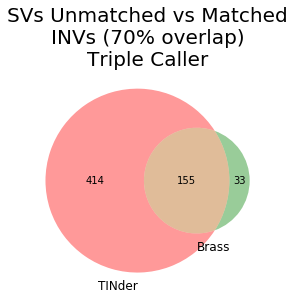

In [621]:
venn2(subsets = (414,33,155), set_labels = ('TINder', 'Brass'))
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nINVs (70% overlap)\nTriple Caller',fontsize=20)
plt.show()

- Scores: 
    - 216/414 (52%) in only TINder and 143/155 (92%) in common have brass>10 in TINder.
    - 31/33 (93%) in only Triple and 151/155 (97%) in common have at least one caller with score>10.
    - 5/33 (15%) in only Triple and 67/155 (43%) in common have  brass>10 in Triple.

#### - Brass score >10:

In [711]:
print(tinder_full_set_INV_DETECT.shape)
tinder_full_set_INV_DETECT.head(1)

(585, 13)


,chr1,start1,start2,SV length,brass_score,SV type,Sample,DHFFC,blacklist,GD_AF,GD_POPMAX_AF,keys,Detection
12,14,49407634,49461450,53816.0,21.0,INV,IID_H158604_T01_01_WG01,1.20652,0.0,-1,-1.0,14_49407634_49461450_IID_H158604_T01_01_WG01,Non Detected


In [712]:
tinder_full_set_INV_DETECT_score=tinder_full_set_INV_DETECT[tinder_full_set_INV_DETECT['brass_score']>=10]
print(tinder_full_set_INV_DETECT_score.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_INV_DETECT_score.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(359, 13)
143 216


In [713]:
print(triple_full_info_dup_INV_DETECT.shape)
triple_full_info_dup_INV_DETECT.head(1)

(188, 11)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD,keys,Detection
12,13,89110965,89112603,13_89110965_13_89112603_INV_--,INV,IID_H158635_T01_01_WG01,0,36,0,13_89110965_89112603_IID_H158635_T01_01_WG01,Non Detected


In [714]:
triple_full_info_dup_INV_DETECT['brass_RC']=triple_full_info_dup_INV_DETECT['brass_RC'].map(int)
triple_full_info_dup_INV_DETECT['gridss_VF']=triple_full_info_dup_INV_DETECT['gridss_VF'].map(int)
triple_full_info_dup_INV_DETECT['svaba_AD']=triple_full_info_dup_INV_DETECT['svaba_AD'].map(int)

triple_full_info_dup_INV_DETECT_score=triple_full_info_dup_INV_DETECT[(triple_full_info_dup_INV_DETECT['brass_RC']>=10) | (triple_full_info_dup_INV_DETECT['gridss_VF']>=10) | (triple_full_info_dup_INV_DETECT['svaba_AD']>=10)]

print(triple_full_info_dup_INV_DETECT_score.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_INV_DETECT_score.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(182, 11)
151 31


In [715]:
triple_full_info_dup_INV_DETECT['brass_RC']=triple_full_info_dup_INV_DETECT['brass_RC'].map(int)
#triple_full_info_dup_DEL_DETECT['gridss_VF']=triple_full_info_dup_DEL_DETECT['gridss_VF'].map(int)
#triple_full_info_dup_DEL_DETECT['svaba_AD']=triple_full_info_dup_DEL_DETECT['svaba_AD'].map(int)

triple_full_info_dup_INV_DETECT_scorebrass=triple_full_info_dup_INV_DETECT[(triple_full_info_dup_INV_DETECT['brass_RC']>=10)]

print(triple_full_info_dup_INV_DETECT_scorebrass.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_INV_DETECT_scorebrass.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(72, 11)
67 5


### D) Intersection Translocations:

### 1.1) TINder calls in TRIPLE CALLER.

In [626]:
tinder_full_set_TRA=tinder_full_set[tinder_full_set['SV type']=='TRA']
print(tinder_full_set_TRA.shape)
tinder_full_set_TRA.head()

(2920, 17)


,chr1,start1,chr2,start2,SV length,brass_score,SV type,DHFC,DHFFC,DHBFC,blacklist,GD_AF,GD_POPMAX_AF,Sample,oncogene,tsg,Gene name
2,12,6791753,22,41528145,NaN,45.0,TRA,NaN,NaN,NaN,1.0,-1,-1.0,IID_H158604_T01_01_WG01,0.0,0.0,ZNF384
3,22,41528145,12,6791753,NaN,45.0,TRA,NaN,NaN,NaN,0.0,-1,-1.0,IID_H158604_T01_01_WG01,0.0,1.0,EP300
6,3,57440298,6,56757780,NaN,33.0,TRA,NaN,NaN,NaN,0.0,-1,-1.0,IID_H158604_T01_01_WG01,0.0,0.0,DNAH12
7,6,56757780,3,57440298,NaN,33.0,TRA,NaN,NaN,NaN,0.0,-1,-1.0,IID_H158604_T01_01_WG01,0.0,0.0,DST
8,22,41443455,12,6613398,NaN,32.0,TRA,NaN,NaN,NaN,0.0,-1,-1.0,IID_H158604_T01_01_WG01,0.0,0.0,NaN


In [627]:
#Formatting
tinder_full_set_TRA_only=pd.DataFrame(columns=['chr1','start1','chr2','start2','brass_score','SV type','blacklist','GD_AF','GD_POPMAX_AF','Sample','oncogene','tsg','Gene name','key'])
dict_keys={}
list_keys=[]
for index,row in tinder_full_set_TRA.iterrows():
    #Sex
    if( (row['chr1']=='X') | (row['chr2']=='X') | (row['chr1']=='Y') | (row['chr2']=='Y')):
        if( (row['chr1']=='X') | (row['chr1']=='Y') ):
            key=str(row['chr2'])+'_'+str(row['start2'])+'_'+str(row['chr1'])+'_'+str(row['start1'])+'_'+row['Sample']
        else:
            key=str(row['chr1'])+'_'+str(row['start1'])+'_'+str(row['chr2'])+'_'+str(row['start2'])+'_'+row['Sample']
    else:   
        if (int(row['chr1'])<int(row['chr2'])):
            key=str(row['chr1'])+'_'+str(row['start1'])+'_'+str(row['chr2'])+'_'+str(row['start2'])+'_'+row['Sample']
        else:
            key=str(row['chr2'])+'_'+str(row['start2'])+'_'+str(row['chr1'])+'_'+str(row['start1'])+'_'+row['Sample']
    
    
    if not key in dict_keys:
        dict_keys[key]={}
        dict_keys[key]=[]
        tinder_full_set_TRA_only=tinder_full_set_TRA_only.append(row)
        list_keys.append(key)

tinder_full_set_TRA_only=tinder_full_set_TRA_only[['chr1','start1','chr2','start2','brass_score','SV type','blacklist','GD_AF','GD_POPMAX_AF','Sample','oncogene','tsg','Gene name']]
tinder_full_set_TRA_only['keys']=list_keys       

In [628]:
print(tinder_full_set_TRA_only.shape)
tinder_full_set_TRA_only.head()

(1461, 14)


,chr1,start1,chr2,start2,brass_score,SV type,blacklist,GD_AF,GD_POPMAX_AF,Sample,oncogene,tsg,Gene name,keys
2,12,6791753,22,41528145,45.0,TRA,1.0,-1,-1.0,IID_H158604_T01_01_WG01,0.0,0.0,ZNF384,12_6791753_22_41528145_IID_H158604_T01_01_WG01
6,3,57440298,6,56757780,33.0,TRA,0.0,-1,-1.0,IID_H158604_T01_01_WG01,0.0,0.0,DNAH12,3_57440298_6_56757780_IID_H158604_T01_01_WG01
8,22,41443455,12,6613398,32.0,TRA,0.0,-1,-1.0,IID_H158604_T01_01_WG01,0.0,0.0,NaN,12_6613398_22_41443455_IID_H158604_T01_01_WG01
14,12,133066750,6,29814677,15.0,TRA,0.0,-1,-1.0,IID_H158604_T01_01_WG01,0.0,0.0,FBRSL1,6_29814677_12_133066750_IID_H158604_T01_01_WG01
18,7,30484917,X,133854112,6.0,TRA,1.0,-1,-1.0,IID_H158604_T01_01_WG01,0.0,0.0,NOD1,7_30484917_X_133854112_IID_H158604_T01_01_WG01


In [629]:
#Lower chromosome always in the first column:
tinder_full_set_TRA_only_order=tinder_full_set_TRA_only.copy()

#Separate Sex
tinder_full_set_TRA_only_orderNum=tinder_full_set_TRA_only_order[~ ((tinder_full_set_TRA_only_order['chr1']=='X')|(tinder_full_set_TRA_only_order['chr1']=='Y')| (tinder_full_set_TRA_only_order['chr2']=='X')|(tinder_full_set_TRA_only_order['chr2']=='Y') )]
tinder_full_set_TRA_only_orderSex=tinder_full_set_TRA_only_order[((tinder_full_set_TRA_only_order['chr1']=='X')|(tinder_full_set_TRA_only_order['chr1']=='Y')| (tinder_full_set_TRA_only_order['chr2']=='X')|(tinder_full_set_TRA_only_order['chr2']=='Y') )]

#Num
tinder_full_set_TRA_only_orderNum['chr1']=tinder_full_set_TRA_only_orderNum['chr1'].map(int)
tinder_full_set_TRA_only_orderNum['chr2']=tinder_full_set_TRA_only_orderNum['chr2'].map(int)
idx = (tinder_full_set_TRA_only_orderNum['chr1'] > tinder_full_set_TRA_only_orderNum['chr2'])
tinder_full_set_TRA_only_orderNum.loc[idx,['chr1','chr2','start1','start2']] = tinder_full_set_TRA_only_orderNum.loc[idx,['chr2','chr1','start2','start1']].values

#Sex
idxx1 = (tinder_full_set_TRA_only_orderSex['chr1'] == 'X')
idxx2 = (tinder_full_set_TRA_only_orderSex['chr1'] == 'Y')
tinder_full_set_TRA_only_orderSex.loc[idxx1,['chr1','chr2','start1','start2']] = tinder_full_set_TRA_only_orderSex.loc[idxx1,['chr2','chr1','start2','start1']].values
tinder_full_set_TRA_only_orderSex.loc[idxx2,['chr1','chr2','start1','start2']] = tinder_full_set_TRA_only_orderSex.loc[idxx2,['chr2','chr1','start2','start1']].values

#Merge
tinder_full_set_TRA_only_order=tinder_full_set_TRA_only_orderNum.append(tinder_full_set_TRA_only_orderSex).reset_index()
print(tinder_full_set_TRA_only_order.shape)
tinder_full_set_TRA_only_order.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/pandas/core/indexing.py:

(1461, 15)


,index,chr1,start1,chr2,start2,brass_score,SV type,blacklist,GD_AF,GD_POPMAX_AF,Sample,oncogene,tsg,Gene name,keys
0,2,12,6791753,22,41528145,45.0,TRA,1.0,-1,-1.0,IID_H158604_T01_01_WG01,0.0,0.0,ZNF384,12_6791753_22_41528145_IID_H158604_T01_01_WG01
1,6,3,57440298,6,56757780,33.0,TRA,0.0,-1,-1.0,IID_H158604_T01_01_WG01,0.0,0.0,DNAH12,3_57440298_6_56757780_IID_H158604_T01_01_WG01
2,8,12,6613398,22,41443455,32.0,TRA,0.0,-1,-1.0,IID_H158604_T01_01_WG01,0.0,0.0,NaN,12_6613398_22_41443455_IID_H158604_T01_01_WG01
3,14,6,29814677,12,133066750,15.0,TRA,0.0,-1,-1.0,IID_H158604_T01_01_WG01,0.0,0.0,FBRSL1,6_29814677_12_133066750_IID_H158604_T01_01_WG01
4,23,4,4704662,5,145747778,6.0,TRA,0.0,-1,-1.0,IID_H158604_T01_01_WG01,0.0,0.0,NaN,4_4704662_5_145747778_IID_H158604_T01_01_WG01


In [646]:
tinder_full_set_TRA_only_order_2intersect=tinder_full_set_TRA_only_order[['chr1','start1','chr2','start2','brass_score','blacklist','GD_AF','GD_POPMAX_AF','SV type','Sample','keys']]
#tinder_full_DEL_2intersect=tinder_full_DEL[['chr1','start1','start2','SV length','brass_score','SV type','DHFC','DHFFC','DHBFC','blacklist','Sample']]

tinder_full_set_TRA_only_order_2intersect['brass_score']=tinder_full_set_TRA_only_order_2intersect['brass_score'].map(int)
tinder_full_set_TRA_only_order_2intersect['blacklist']=tinder_full_set_TRA_only_order_2intersect['blacklist'].map(int)
tinder_full_set_TRA_only_order_2intersect['GD_AF']=tinder_full_set_TRA_only_order_2intersect['GD_AF'].map(int)
tinder_full_set_TRA_only_order_2intersect['GD_POPMAX_AF']=tinder_full_set_TRA_only_order_2intersect['GD_POPMAX_AF'].map(int)

#tinder_full_DEL_2intersect['start1']=tinder_full_DEL_2intersect['start1'].map(int)

print(tinder_full_set_TRA_only_order_2intersect.shape)
tinder_full_set_TRA_only_order_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is t

(1461, 11)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,chr1,start1,chr2,start2,brass_score,blacklist,GD_AF,GD_POPMAX_AF,SV type,Sample,keys
0,12,6791753,22,41528145,45,1,-1,-1,TRA,IID_H158604_T01_01_WG01,12_6791753_22_41528145_IID_H158604_T01_01_WG01
1,3,57440298,6,56757780,33,0,-1,-1,TRA,IID_H158604_T01_01_WG01,3_57440298_6_56757780_IID_H158604_T01_01_WG01
2,12,6613398,22,41443455,32,0,-1,-1,TRA,IID_H158604_T01_01_WG01,12_6613398_22_41443455_IID_H158604_T01_01_WG01
3,6,29814677,12,133066750,15,0,-1,-1,TRA,IID_H158604_T01_01_WG01,6_29814677_12_133066750_IID_H158604_T01_01_WG01
4,4,4704662,5,145747778,6,0,-1,-1,TRA,IID_H158604_T01_01_WG01,4_4704662_5_145747778_IID_H158604_T01_01_WG01


In [647]:
tinder_full_set_TRA_only_order_2intersect[tinder_full_set_TRA_only_order_2intersect['Sample']=='IID_H158604_T01_01_WG01']

,chr1,start1,chr2,start2,brass_score,blacklist,GD_AF,GD_POPMAX_AF,SV type,Sample,keys
0,12,6791753,22,41528145,45,1,-1,-1,TRA,IID_H158604_T01_01_WG01,12_6791753_22_41528145_IID_H158604_T01_01_WG01
1,3,57440298,6,56757780,33,0,-1,-1,TRA,IID_H158604_T01_01_WG01,3_57440298_6_56757780_IID_H158604_T01_01_WG01
2,12,6613398,22,41443455,32,0,-1,-1,TRA,IID_H158604_T01_01_WG01,12_6613398_22_41443455_IID_H158604_T01_01_WG01
3,6,29814677,12,133066750,15,0,-1,-1,TRA,IID_H158604_T01_01_WG01,6_29814677_12_133066750_IID_H158604_T01_01_WG01
4,4,4704662,5,145747778,6,0,-1,-1,TRA,IID_H158604_T01_01_WG01,4_4704662_5_145747778_IID_H158604_T01_01_WG01
5,6,39446006,7,26208015,5,0,-1,-1,TRA,IID_H158604_T01_01_WG01,6_39446006_7_26208015_IID_H158604_T01_01_WG01
6,1,159420251,17,55923715,5,0,-1,-1,TRA,IID_H158604_T01_01_WG01,1_159420251_17_55923715_IID_H158604_T01_01_WG01
7,11,37429052,17,10138558,5,0,-1,-1,TRA,IID_H158604_T01_01_WG01,11_37429052_17_10138558_IID_H158604_T01_01_WG01
8,10,34177953,11,65607031,5,0,-1,-1,TRA,IID_H158604_T01_01_WG01,10_34177953_11_65607031_IID_H158604_T01_01_WG01
9,8,53553827,12,81199841,4,0,-1,-1,TRA,IID_H158604_T01_01_WG01,8_53553827_12_81199841_IID_H158604_T01_01_WG01


In [648]:
triple_full_info_dup_TRA=triple_full_info_dup[triple_full_info_dup['SV type']=='TRA']
print(triple_full_info_dup_TRA.shape)
triple_full_info_dup_TRA.head()

(424, 9)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD
39,5,91140686,91140687,5_91140686_7_32355672_TRA_+-,TRA,IID_H158612_T01_01_WG01,3,11,11
40,5,121735582,121735583,5_121735582_7_39434467_TRA_-+,TRA,IID_H158612_T01_01_WG01,8,22,21
239,7,32355672,32355673,5_91140686_7_32355672_TRA_+-,TRA,IID_H158612_T01_01_WG01,0,0,0
244,7,39434467,39434468,5_121735582_7_39434467_TRA_-+,TRA,IID_H158612_T01_01_WG01,0,0,0
3,14,106329704,106329705,14_106329704_20_48820040_TRA_++,TRA,IID_H158619_T01_01_WG01,20,63,42


In [649]:
triple_full_info_dup_TRA.drop_duplicates('ID', inplace=True)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [650]:
triple_full_info_dup_TRA.shape

(212, 9)

In [651]:
tra2_chr=[]
tra2_pos=[]

for index,row in triple_full_info_dup_TRA.iterrows():
    chrom=row['ID'].split('_')[2]
    pos=row['ID'].split('_')[3]
    
    tra2_chr.append(chrom)
    tra2_pos.append(pos)

triple_full_info_dup_TRA['SV chrom2']=tra2_chr
triple_full_info_dup_TRA['SV start2']=tra2_pos

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [638]:
triple_full_info_dup_TRA.head()

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD,SV chrom2,SV start2
39,5,91140686,91140687,5_91140686_7_32355672_TRA_+-,TRA,IID_H158612_T01_01_WG01,3,11,11,7,32355672
40,5,121735582,121735583,5_121735582_7_39434467_TRA_-+,TRA,IID_H158612_T01_01_WG01,8,22,21,7,39434467
3,14,106329704,106329705,14_106329704_20_48820040_TRA_++,TRA,IID_H158619_T01_01_WG01,20,63,42,20,48820040
9,14,106357560,106357561,14_106357560_20_48706973_TRA_--,TRA,IID_H158619_T01_01_WG01,10,73,70,20,48706973
10,17,27420723,27420724,8_38257261_17_27420723_TRA_-+,TRA,IID_H158609_T01_01_WG01,0,0,0,17,27420723


In [655]:
keys=[]
for index,row in triple_full_info_dup_TRA.iterrows():
    keys.append(str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV chrom2'])+'_'+str(row['SV start2'])+'_'+row['Sample'])
triple_full_info_dup_TRA_key=triple_full_info_dup_TRA.copy()
triple_full_info_dup_TRA_key['keys']=keys
triple_full_info_dup_TRA_key.head()

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD,SV chrom2,SV start2,keys
39,5,91140686,91140687,5_91140686_7_32355672_TRA_+-,TRA,IID_H158612_T01_01_WG01,3,11,11,7,32355672,5_91140686_7_32355672_IID_H158612_T01_01_WG01
40,5,121735582,121735583,5_121735582_7_39434467_TRA_-+,TRA,IID_H158612_T01_01_WG01,8,22,21,7,39434467,5_121735582_7_39434467_IID_H158612_T01_01_WG01
3,14,106329704,106329705,14_106329704_20_48820040_TRA_++,TRA,IID_H158619_T01_01_WG01,20,63,42,20,48820040,14_106329704_20_48820040_IID_H158619_T01_01_WG01
9,14,106357560,106357561,14_106357560_20_48706973_TRA_--,TRA,IID_H158619_T01_01_WG01,10,73,70,20,48706973,14_106357560_20_48706973_IID_H158619_T01_01_WG01
10,17,27420723,27420724,8_38257261_17_27420723_TRA_-+,TRA,IID_H158609_T01_01_WG01,0,0,0,17,27420723,17_27420723_17_27420723_IID_H158609_T01_01_WG01


- Iteration of the "tinder_full_set_TRA_only_order_2intersect" tsv and look for a match in triple_full_info_dup_TRA_key:

In [659]:
print(tinder_full_set_TRA_only_order_2intersect.shape)
tinder_full_set_TRA_only_order_2intersect.head(1)

(1461, 11)


,chr1,start1,chr2,start2,brass_score,blacklist,GD_AF,GD_POPMAX_AF,SV type,Sample,keys
0,12,6791753,22,41528145,45,1,-1,-1,TRA,IID_H158604_T01_01_WG01,12_6791753_22_41528145_IID_H158604_T01_01_WG01


In [660]:
print(triple_full_info_dup_TRA_key.shape)
triple_full_info_dup_TRA_key.head(1)

(212, 12)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD,SV chrom2,SV start2,keys
39,5,91140686,91140687,5_91140686_7_32355672_TRA_+-,TRA,IID_H158612_T01_01_WG01,3,11,11,7,32355672,5_91140686_7_32355672_IID_H158612_T01_01_WG01


In [658]:
intersect_TRA=pd.DataFrame(columns=['chr1','start1','chr2','start2','brass_score','blacklist','GD_AF','GD_POPMAX_AF','SV type','Sample'])
intersect_TRA2=pd.DataFrame()

#intersect_TRA=pd.DataFrame(columns=['chr1','start1','end1','chr2','start2','end2','brass_score','svclass','sample','assembly_score','copynumber_flag','micro-homology','assembled read count','gene1','region1','gene2','region2'])

for index,row in tinder_full_set_TRA_only_order_2intersect.iterrows():
    for index2,row2 in triple_full_info_dup_TRA.iterrows():
        #Check chromosomes
        if((str(row['chr1'])==str(row2['SV chrom'])) & (str(row['chr2'])==str(row2['SV chrom2']))):
            #Check Window of overlapping
            window1_1=row['start1']-10000
            window1_2=row['start1']+10000
            window2_1=row['start2']-10000
            window2_2=row['start2']+10000
            if((int(row2['SV start']) >=  window1_1) & (int(row2['SV start']) <=  window1_2) & (int(row2['SV start2']) >=  window2_1) & (int(row2['SV start2']) <=  window2_2) & (row['Sample']==row2['Sample']  )):
                intersect_TRA=intersect_TRA.append(row)
                intersect_TRA2=intersect_TRA2.append(row2)

print(intersect_TRA.shape)
print(len(intersect_TRA['keys'].unique()))
intersect_TRA.head()

(118, 11)
112


,chr1,start1,chr2,start2,brass_score,blacklist,GD_AF,GD_POPMAX_AF,SV type,Sample,keys
0,12,6791753,22,41528145,45,1,-1,-1,TRA,IID_H158604_T01_01_WG01,12_6791753_22_41528145_IID_H158604_T01_01_WG01
2,12,6613398,22,41443455,32,0,-1,-1,TRA,IID_H158604_T01_01_WG01,12_6613398_22_41443455_IID_H158604_T01_01_WG01
147,5,121735581,7,39434465,15,0,-1,-1,TRA,IID_H158612_T01_01_WG01,5_121735581_7_39434465_IID_H158612_T01_01_WG01
148,5,91140685,7,32355671,10,0,-1,-1,TRA,IID_H158612_T01_01_WG01,5_91140685_7_32355671_IID_H158612_T01_01_WG01
158,1,94387382,22,41581964,34,0,-1,-1,TRA,IID_H158613_T01_01_WG01,1_94387382_22_41581964_IID_H158613_T01_01_WG01


In [673]:
#Detection TINder

detection=[]
for index,row in tinder_full_set_TRA_only_order_2intersect.iterrows():
    if (row['keys'] in list(intersect_TRA['keys'])):
        detection.append('Detected')
    else:
        detection.append('Non Detected')
        
tinder_full_set_TRA_only_order_2intersect_DETECT=tinder_full_set_TRA_only_order_2intersect.copy()
tinder_full_set_TRA_only_order_2intersect_DETECT['Detection']=detection

In [674]:
print(tinder_full_set_TRA_only_order_2intersect_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_TRA_only_order_2intersect_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(1461, 12)
112 1349


In [676]:
intersect_TRA2.head()

,ID,SV chrom,SV chrom2,SV end,SV start,SV start2,SV type,Sample,brass_RC,gridss_VF,svaba_AD
2,12_6791754_22_41528146_TRA_++,12,22,6791755.0,6791754.0,41528146,TRA,IID_H158604_T01_01_WG01,0,60,43
0,12_6612742_22_41443469_TRA_--,12,22,6612743.0,6612742.0,41443469,TRA,IID_H158604_T01_01_WG01,0,40,37
40,5_121735582_7_39434467_TRA_-+,5,7,121735583.0,121735582.0,39434467,TRA,IID_H158612_T01_01_WG01,8,22,21
39,5_91140686_7_32355672_TRA_+-,5,7,91140687.0,91140686.0,32355672,TRA,IID_H158612_T01_01_WG01,3,11,11
4139,1_94387383_22_41581965_TRA_-+,1,22,94387384.0,94387383.0,41581965,TRA,IID_H158613_T01_01_WG01,15,42,18


In [677]:
#Detection Triple Caller

detection=[]
for index,row in triple_full_info_dup_TRA_key.iterrows():
    if (row['ID'] in list(intersect_TRA2['ID'])):
        detection.append('Detected')
    else:
        detection.append('Non Detected')
        
triple_full_info_dup_TRA_key_DETECT=triple_full_info_dup_TRA_key.copy()
triple_full_info_dup_TRA_key_DETECT['Detection']=detection

In [678]:
print(triple_full_info_dup_TRA_key_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_TRA_key_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(212, 13)
108 104


In [191]:
intersect_TRA.drop_duplicates(inplace=True)
print(intersect_TRA.shape)

(112, 10)


In [192]:
intersect_TRA2.drop_duplicates(inplace=True)
print(intersect_TRA2.shape)

(108, 8)


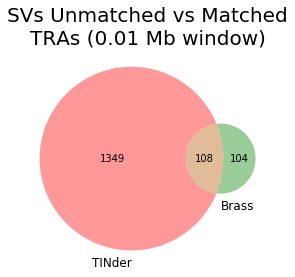

In [679]:
venn2(subsets = (1349,104,108), set_labels = ('TINder', 'Brass'))
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nTRAs (0.01 Mb window)',fontsize=20)
plt.show()

- Scores: 
    - 250/1349 (19%) in only TINder and 103/108 (95%) in common have brass>10 in TINder.
    - 25/104 (24%) in only Triple and 107/108 (99%) in common have at least one caller with score>10.
    - 6/104 (6%) in only Triple and 64/108 (59%) in common have  brass>10 in Triple.

### - Brass score 10:

In [719]:
print(tinder_full_set_TRA_only_order_2intersect_DETECT.shape)
tinder_full_set_TRA_only_order_2intersect_DETECT.head(1)

(1461, 12)


,chr1,start1,chr2,start2,brass_score,blacklist,GD_AF,GD_POPMAX_AF,SV type,Sample,keys,Detection
0,12,6791753,22,41528145,45,1,-1,-1,TRA,IID_H158604_T01_01_WG01,12_6791753_22_41528145_IID_H158604_T01_01_WG01,Detected


In [726]:
tinder_full_set_TRA_only_order_2intersect_DETECT_score=tinder_full_set_TRA_only_order_2intersect_DETECT[tinder_full_set_TRA_only_order_2intersect_DETECT['brass_score']>=10]
tinder_full_set_TRA_only_order_2intersect_DETECT_score['Detection'].value_counts()

Non Detected    250
Detected        103
Name: Detection, dtype: int64

In [727]:
print(triple_full_info_dup_TRA_key_DETECT.shape)
triple_full_info_dup_TRA_key_DETECT.head(1)

(212, 13)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_RC,gridss_VF,svaba_AD,SV chrom2,SV start2,keys,Detection
39,5,91140686,91140687,5_91140686_7_32355672_TRA_+-,TRA,IID_H158612_T01_01_WG01,3,11,11,7,32355672,5_91140686_7_32355672_IID_H158612_T01_01_WG01,Detected


In [728]:
triple_full_info_dup_TRA_key_DETECT['brass_RC']=triple_full_info_dup_TRA_key_DETECT['brass_RC'].map(int)
triple_full_info_dup_TRA_key_DETECT['gridss_VF']=triple_full_info_dup_TRA_key_DETECT['gridss_VF'].map(int)
triple_full_info_dup_TRA_key_DETECT['svaba_AD']=triple_full_info_dup_TRA_key_DETECT['svaba_AD'].map(int)

triple_full_info_dup_TRA_key_DETECT_score=triple_full_info_dup_TRA_key_DETECT[(triple_full_info_dup_TRA_key_DETECT['brass_RC']>=10) | (triple_full_info_dup_TRA_key_DETECT['gridss_VF']>=10) | (triple_full_info_dup_TRA_key_DETECT['svaba_AD']>=10)]
triple_full_info_dup_TRA_key_DETECT_score['Detection'].value_counts()

Detected        107
Non Detected     25
Name: Detection, dtype: int64

In [729]:
triple_full_info_dup_TRA_key_DETECT['brass_RC']=triple_full_info_dup_TRA_key_DETECT['brass_RC'].map(int)

triple_full_info_dup_TRA_key_DETECT_score=triple_full_info_dup_TRA_key_DETECT[(triple_full_info_dup_TRA_key_DETECT['brass_RC']>=10)]
triple_full_info_dup_TRA_key_DETECT_score['Detection'].value_counts()

Detected        64
Non Detected     6
Name: Detection, dtype: int64